In [1]:
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

from sklearn import svm

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = 'NanumGothicCoding'

from visualize import plot_confusion_matrix

# Which one are you analyzing?

## M_0

In [2]:
df = pd.read_csv('Data_M_0.csv')
df = df.drop(['pid',
              'Type',
             'recent_by',
             'own_sedan',
             'own_suv',
             'own_ice',
             'own_zev',
             'oldest_car',
              
             'gasoline_fuel_type',
             'gasoline_old',
              'diesel_fuel_type',
             'diesel_old',
              'electric_fuel_type',
             'electric_old',
              'hydrogen_fuel_type',
             'hydrogen_old',
             ],
             axis='columns')
print(df.shape)
df.head()

(4128, 46)


,policy,eco,tech,age,gender,owning,mileage,family,job,wealth,...,diesel_fuel_cost,diesel_price,electric_car_class,electric_infra,electric_fuel_cost,electric_price,hydrogen_car_class,hydrogen_infra,hydrogen_fuel_cost,hydrogen_price
0,3,3,2,31,1,1,10000,3,3,7,...,150,4000,1,50,100,4000,0,100,100,4000
1,3,3,2,31,1,1,10000,3,3,7,...,50,3000,1,50,50,4000,0,100,50,4000
2,3,3,2,31,1,1,10000,3,3,7,...,150,2000,1,100,50,5000,1,100,150,3000
3,3,3,2,31,1,1,10000,3,3,7,...,100,5000,1,100,150,5000,0,50,150,5000
4,3,3,2,31,1,1,10000,3,3,7,...,50,2000,0,100,100,2000,1,100,50,3000


In [3]:
NUMERICAL_COLUMNS = [
    'policy',
    'eco',
    'tech',
    'age',
    'owning',
    'mileage',
    'family',
    'wealth',

    'gasoline_infra',
    'gasoline_fuel_cost',
    'gasoline_price',
    'diesel_infra',
    'diesel_fuel_cost',
    'diesel_price',
    'electric_infra',
    'electric_fuel_cost',
    'electric_price',
    'hydrogen_infra',
    'hydrogen_fuel_cost',
    'hydrogen_price',
]

CATEGORICAL_COLUMNS= [
    'gender',
    'job',
    
    'Car1_fuel_type',
    'Car1_car_class',
    'Car1_infra',
    'Car1_fuel_cost',
    'Car1_price',
    'Car1_old',
    'Car2_fuel_type',
    'Car2_car_class',
    'Car2_infra',
    'Car2_fuel_cost',
    'Car2_price',
    'Car2_old',
    'Car3_fuel_type',
    'Car3_car_class',
    'Car3_infra',
    'Car3_fuel_cost',
    'Car3_price',
    'Car3_old',
    
    'gasoline_car_class',
    'diesel_car_class',
    'electric_car_class',
    'hydrogen_car_class',
]
TARGET_COLUMNS = [
    'choice',
]

In [4]:
target_names = [
    'SQ',
    'SQ_gasoline',
    'SQ_diesel',
    'SQ_electric',
    'SQ_hydrogen',
    '1_gasoline',
    '1_diesel',
    '1_electric',
    '1_hydrogen',
    '2_gasoline',
    '2_diesel',
    '2_electric',
    '2_hydrogen',
    '3_gasoline',
    '3_diesel',
    '3_electric',
    '3_hydrogen',
]

## M_1

In [47]:
df = pd.read_csv('Data_M_1.csv')
df = df.drop(['pid',
              'Type',
             'recent_by',
             'own_sedan',
             'own_suv',
             'own_ice',
             'own_zev',
             'oldest_car',
              
             'gasoline_old',
              'diesel_fuel_type',
             'diesel_old',
              'electric_fuel_type',
             'electric_old',
              'hydrogen_fuel_type',
             'hydrogen_old',
             ],
             axis='columns')
print(df.shape)
df.head()

(4128, 45)


,policy,eco,tech,age,gender,owning,mileage,family,job,wealth,...,diesel_fuel_cost,diesel_price,electric_car_class,electric_infra,electric_fuel_cost,electric_price,hydrogen_car_class,hydrogen_infra,hydrogen_fuel_cost,hydrogen_price
0,3,3,2,31,1,1,10000,3,3,7,...,150,4000,1,50,100,4000,0,100,100,4000
1,3,3,2,31,1,1,10000,3,3,7,...,50,3000,1,50,50,4000,0,100,50,4000
2,3,3,2,31,1,1,10000,3,3,7,...,150,2000,1,100,50,5000,1,100,150,3000
3,3,3,2,31,1,1,10000,3,3,7,...,100,5000,1,100,150,5000,0,50,150,5000
4,3,3,2,31,1,1,10000,3,3,7,...,50,2000,0,100,100,2000,1,100,50,3000


In [63]:
NUMERICAL_COLUMNS = [
    'policy',
    'eco',
    'tech',
    'age',
    'owning',
    'mileage',
    'family',
    'wealth',

    'gasoline_infra',
    'gasoline_fuel_cost',
    'gasoline_price',
    'diesel_infra',
    'diesel_fuel_cost',
    'diesel_price',
    'electric_infra',
    'electric_fuel_cost',
    'electric_price',
    'hydrogen_infra',
    'hydrogen_fuel_cost',
    'hydrogen_price',
]

CATEGORICAL_COLUMNS= [
    'gender',
    'job',
    
#     'Car1_fuel_type',
#     'Car1_car_class',
#     'Car1_infra',
#     'Car1_fuel_cost',
#     'Car1_price',
#     'Car1_old',
#     'Car2_fuel_type',
#     'Car2_car_class',
#     'Car2_infra',
#     'Car2_fuel_cost',
#     'Car2_price',
#     'Car2_old',
#     'Car3_fuel_type',
#     'Car3_car_class',
#     'Car3_infra',
#     'Car3_fuel_cost',
#     'Car3_price',
#     'Car3_old',
    
    'gasoline_car_class',
    'diesel_car_class',
    'electric_car_class',
    'hydrogen_car_class',
]
TARGET_COLUMNS = [
    'answer',
]

In [64]:
target_names = [
    'gasoline',
    'diesel',
    'electric',
    'hydrogen',
]

# M_2

In [132]:
df = pd.read_csv('Data_M_2.csv')
df = df.drop(['pid',
              'Type',
             'recent_by',
             'own_sedan',
             'own_suv',
             'own_ice',
             'own_zev',
             'oldest_car',
             ],
             axis='columns')
print(df.shape)
df.head()

(4128, 33)


,policy,eco,tech,age,gender,owning,mileage,family,job,wealth,...,Car3_fuel_type,Car3_car_class,Car3_infra,Car3_fuel_cost,Car3_price,Car3_old,p_infra,p_class,p_fuel_cost,p_price
0,3,3,2,31,1,1,10000,3,3,7,...,0,0,0,0,0,0,50,1,50,4000
1,3,3,2,31,1,1,10000,3,3,7,...,0,0,0,0,0,0,100,1,50,5000
2,3,3,2,31,1,1,10000,3,3,7,...,0,0,0,0,0,0,100,1,150,5000
3,3,3,2,31,1,1,10000,3,3,7,...,0,0,0,0,0,0,100,1,50,2000
4,3,3,2,31,1,1,10000,3,3,7,...,0,0,0,0,0,0,50,2,50,5000


In [133]:
NUMERICAL_COLUMNS = [
    'policy',
    'eco',
    'tech',
    'age',
    'owning',
    'mileage',
    'family',
    'wealth',
    
    'p_infra',
    'p_class',
    'p_fuel_cost',
    'p_price',
]

CATEGORICAL_COLUMNS= [
    'gender',
    'job',
    
#     'Car1_fuel_type',
#     'Car1_car_class',
#     'Car1_infra',
#     'Car1_fuel_cost',
#     'Car1_price',
#     'Car1_old',
#     'Car2_fuel_type',
#     'Car2_car_class',
#     'Car2_infra',
#     'Car2_fuel_cost',
#     'Car2_price',
#     'Car2_old',
#     'Car3_fuel_type',
#     'Car3_car_class',
#     'Car3_infra',
#     'Car3_fuel_cost',
#     'Car3_price',
#     'Car3_old',
]
TARGET_COLUMNS = [
    'choice',
]

In [134]:
target_names = [
    'Not Purchasing',
    'Additional Purchase',
    'Exchanging Purchase',
]

# M_3

In [138]:
df = pd.read_csv('Data_M_3.csv')
df = df.drop(['pid',
              'Type',
             'recent_by',
             'own_sedan',
             'own_suv',
             'own_ice',
             'own_zev',
             'oldest_car',
             ],
             axis='columns')
print(df.shape)
df.head()

(378, 34)


,policy,eco,tech,age,gender,owning,mileage,family,job,wealth,...,Car3_car_class,Car3_infra,Car3_fuel_cost,Car3_price,Car3_old,p_fuel_type,p_infra,p_class,p_fuel_cost,p_price
0,3,4,3,56,1,2,30000,2,9,4,...,0,0,0,0,0,3,50,1,50,4000
1,3,4,3,56,1,2,30000,2,9,4,...,0,0,0,0,0,3,100,1,50,5000
2,3,4,3,56,1,2,30000,2,9,4,...,0,0,0,0,0,3,100,1,150,5000
3,3,4,3,56,1,2,30000,2,9,4,...,0,0,0,0,0,3,100,2,100,2000
4,3,4,3,56,1,2,30000,2,9,4,...,0,0,0,0,0,3,10,2,150,3000


In [151]:
NUMERICAL_COLUMNS = [
    'policy',
    'eco',
    'tech',
    'age',
    'owning',
    'mileage',
    'family',
    'wealth',
    
    'p_infra',
    'p_class',
    'p_fuel_cost',
    'p_price',
]

CATEGORICAL_COLUMNS= [
    'gender',
    'job',
    
    'Car1_fuel_type',
    'Car1_car_class',
    'Car1_infra',
    'Car1_fuel_cost',
    'Car1_price',
    'Car1_old',
    'Car2_fuel_type',
    'Car2_car_class',
    'Car2_infra',
    'Car2_fuel_cost',
    'Car2_price',
    'Car2_old',
    'Car3_fuel_type',
    'Car3_car_class',
    'Car3_infra',
    'Car3_fuel_cost',
    'Car3_price',
    'Car3_old',
]
TARGET_COLUMNS = [
    'choice',
]

In [152]:
target_names = [
    'Car1',
    'Car2',
    'Car3',
]

# Analyzing Starts Here

In [153]:
#BINARY = False
TARGET_COLUMN = TARGET_COLUMNS[0]

FEATURE_NAMES = NUMERICAL_COLUMNS[:]
X_numerical = df[NUMERICAL_COLUMNS].values

num_categories = []
X_categorical = []
for column in CATEGORICAL_COLUMNS:
    df_column = df[column]
    X_column = df_column.map({value:i for i, value in enumerate(sorted(list(set(df_column))))}).values
    X_categorical.append(X_column.reshape(-1, 1))
    num_categories.append(len(set(X_column)))
#    print(FEATURE_NAMES)
#    print(column)
#    print(df_column)
    FEATURE_NAMES += [column + '_' + str(value) for value in sorted(list(set(df_column)))]
X_categorical = np.hstack(X_categorical)

one_hot_encoder = OneHotEncoder()
X_categorical = one_hot_encoder.fit_transform(
    X_categorical
).toarray()
assert sum(num_categories) == X_categorical.shape[1]

X = np.hstack([X_numerical, X_categorical])
assert X.shape[1] == len(FEATURE_NAMES)

# if BINARY:
#     y = (df[TARGET_COLUMN].values == 4).astype(np.int32)
# else:
#     y = df[TARGET_COLUMN].values

y = df[TARGET_COLUMN]
#y, target_names = y.factorize()

print(X.shape, y.shape)

(378, 89) (378,)


In [154]:
Counter(y)

Counter({1: 197, 2: 175, 3: 6})

In [155]:
len(FEATURE_NAMES)

89

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [157]:
Counter(y_test)

Counter({1: 63, 2: 48, 3: 3})

In [158]:
print(target_names)

['Car1', 'Car2', 'Car3']


In [159]:
Counter(y_train)

Counter({2: 127, 1: 134, 3: 3})

### Decision Tree

In [85]:
clf = DecisionTreeClassifier(max_depth=5)
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

        Car1       0.79      0.73      0.76        63
        Car2       0.66      0.77      0.71        48
        Car3       0.00      0.00      0.00         3

    accuracy                           0.73       114
   macro avg       0.48      0.50      0.49       114
weighted avg       0.72      0.73      0.72       114



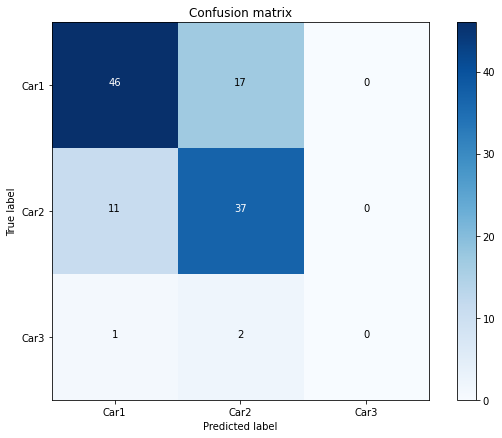

In [420]:
print(classification_report(y_test, y_pred, target_names=target_names,))
plot_confusion_matrix(y_test, y_pred, target_names=target_names, )

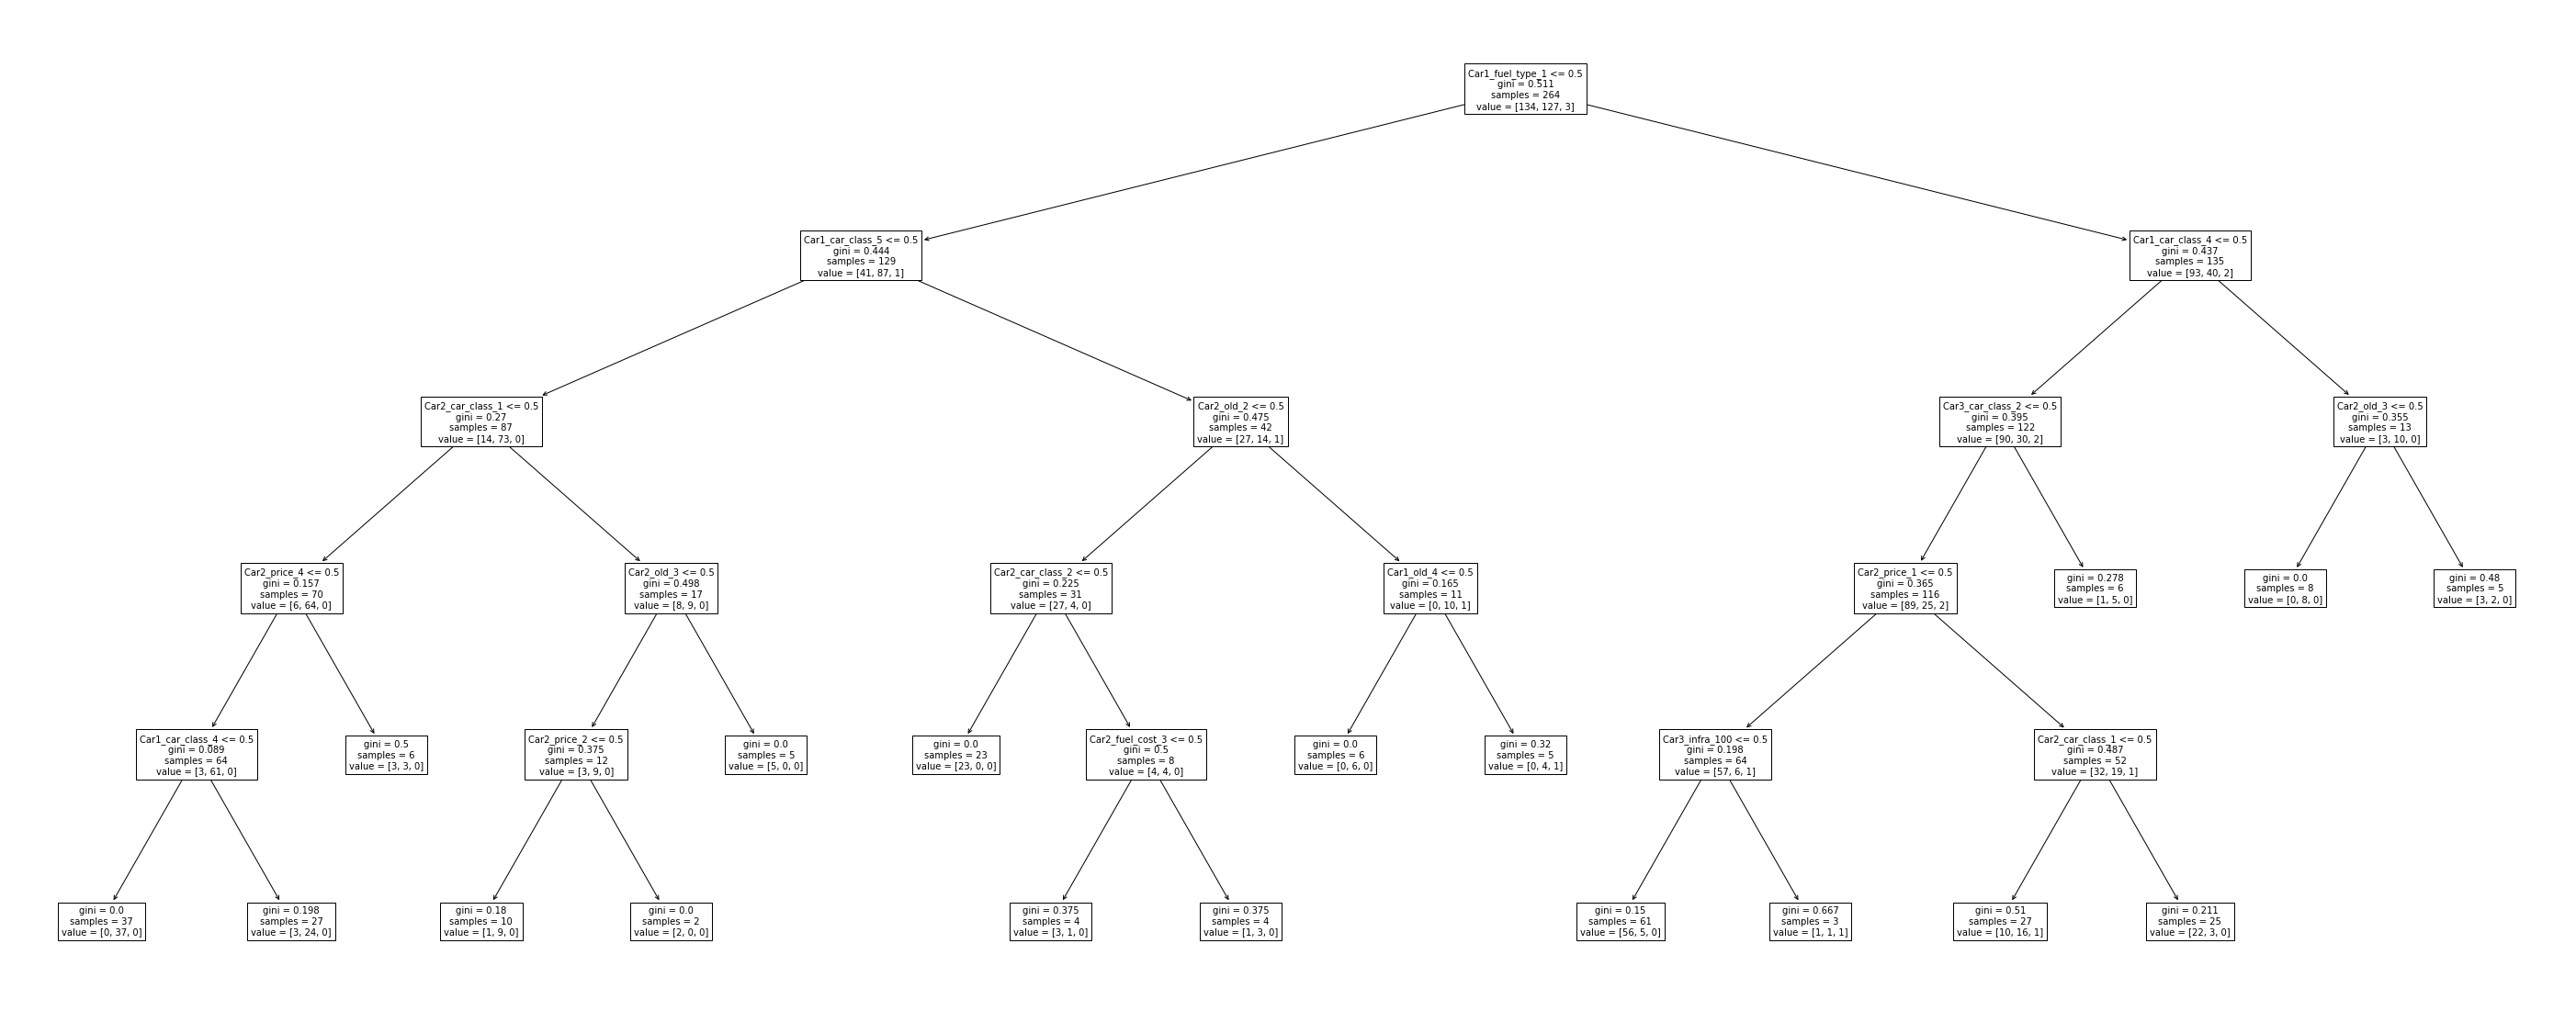

In [421]:
fig, ax = plt.subplots(figsize=(50, 20))
plot_tree(clf, feature_names=FEATURE_NAMES, fontsize=10, ax=ax)
fig.savefig('tree.png')

### Random Forest

In [57]:
clf = RandomForestClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

    gasoline       0.35      0.32      0.33       273
      diesel       0.35      0.16      0.22       204
    electric       0.49      0.74      0.59       506
    hydrogen       0.39      0.21      0.28       256

    accuracy                           0.44      1239
   macro avg       0.40      0.36      0.36      1239
weighted avg       0.42      0.44      0.41      1239



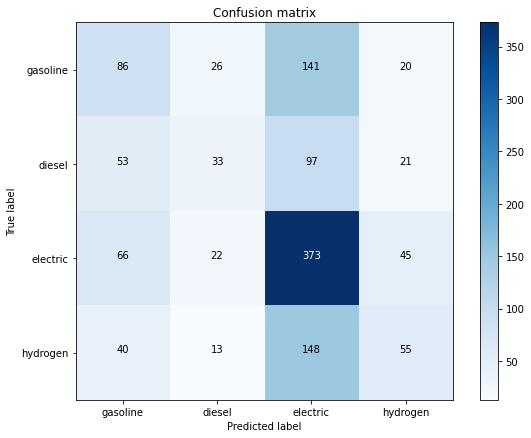

In [58]:
print(classification_report(y_test, y_pred, target_names=target_names,))
plot_confusion_matrix(y_test, y_pred, target_names=target_names, )

In [59]:
print(classification_report(y_test, y_pred, target_names=target_names, labels=list(range(len(target_names)))))
plot_confusion_matrix(y_test, y_pred, target_names=target_names, #labels=list(range(len(target_names))))

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_22352/4248554800.py, line 2)

In [426]:
cumsum_num_categories = [0] + list(np.cumsum(num_categories))

importances = clf.feature_importances_
numerical_importances = importances[:len(NUMERICAL_COLUMNS)]
categorical_importances = []
for start_index, end_index in zip(cumsum_num_categories[:-1], cumsum_num_categories[1:]):
    categorical_importances.append(sum(importances[len(NUMERICAL_COLUMNS):][start_index:end_index]))

sum(numerical_importances) + sum(categorical_importances)

0.9999999999999999

In [427]:
print('Numerical')
for i in np.argsort(numerical_importances)[::-1]:
    print(f'{numerical_importances[i]:.3f}', NUMERICAL_COLUMNS[i])

Numerical


In [428]:
print('Categorical')
for i in np.argsort(categorical_importances)[::-1]:
    print(f'{categorical_importances[i]:.3f}', f'{num_categories[i]:3d}', CATEGORICAL_COLUMNS[i])

Categorical
0.129   6 Car1_car_class
0.124   4 Car2_old
0.110   6 Car2_car_class
0.088   4 Car1_fuel_type
0.088   4 Car2_fuel_cost
0.085   4 Car1_fuel_cost
0.075   4 Car2_price
0.073   4 Car1_price
0.073   4 Car2_fuel_type
0.054   4 Car1_old
0.036   2 Car1_infra
0.012   2 Car3_infra
0.011   4 Car3_car_class
0.010   4 Car3_old
0.010   3 Car3_price
0.008   2 Car2_infra
0.007   3 Car3_fuel_type
0.005   4 Car3_fuel_cost


## SVM

In [160]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('clf', svm.SVC()),
])

In [161]:
clf.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler(copy=False)), ('clf', SVC())],
 'verbose': False,
 'scaler': StandardScaler(copy=False),
 'clf': SVC(),
 'scaler__copy': False,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'clf__C': 1.0,
 'clf__break_ties': False,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 'scale',
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

In [162]:
for C in [10**i for i in range(-5, 5)]:
    for gamma in [10**i for i in range(-5, 5)]:
        clf.set_params(clf__C=C, clf__gamma=gamma)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        print(C, gamma, precision_score(y_test, y_pred, average='weighted'), accuracy_score(y_test, y_pred))
#         plot_confusion_matrix(y_test, y_pred, target_names=target_names)

1e-05 1e-05 0.3054016620498615 0.5526315789473685
1e-05 0.0001 0.3054016620498615 0.5526315789473685
1e-05 0.001 0.3054016620498615 0.5526315789473685
1e-05 0.01 0.3054016620498615 0.5526315789473685
1e-05 0.1 0.3054016620498615 0.5526315789473685
1e-05 1 0.3054016620498615 0.5526315789473685
1e-05 10 0.3054016620498615 0.5526315789473685
1e-05 100 0.3054016620498615 0.5526315789473685
1e-05 1000 0.3054016620498615 0.5526315789473685
1e-05 10000 0.3054016620498615 0.5526315789473685
0.0001 1e-05 0.3054016620498615 0.5526315789473685
0.0001 0.0001 0.3054016620498615 0.5526315789473685
0.0001 0.001 0.3054016620498615 0.5526315789473685
0.0001 0.01 0.3054016620498615 0.5526315789473685
0.0001 0.1 0.3054016620498615 0.5526315789473685
0.0001 1 0.3054016620498615 0.5526315789473685
0.0001 10 0.3054016620498615 0.5526315789473685
0.0001 100 0.3054016620498615 0.5526315789473685
0.0001 1000 0.3054016620498615 0.5526315789473685
0.0001 10000 0.3054016620498615 0.5526315789473685
0.001 1e-05 0.

In [46]:
for C in [10**i for i in range(-5, 5)]:
    for gamma in [10**i for i in range(-5, 5)]:
        clf.set_params(clf__C=C, clf__gamma=gamma)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        print(C, gamma, f'{accuracy_score(y_test, y_pred):.2f}')
        print(f"{f1_score(y_test, y_pred, average='weighted'):.2f} {recall_score(y_test, y_pred, average='weighted'):.2f} {precision_score(y_test, y_pred, average='weighted'):.2f}")
        print(f"{f1_score(y_test, y_pred, average='macro'):.2f} {recall_score(y_test, y_pred, average='macro'):.2f} {precision_score(y_test, y_pred, average='macro'):.2f}")
#         plot_confusion_matrix(y_test, y_pred, target_names=target_names)

1e-05 1e-05 0.41
0.24 0.41 0.17
0.14 0.25 0.10
1e-05 0.0001 0.41
0.24 0.41 0.17
0.14 0.25 0.10
1e-05 0.001 0.41
0.24 0.41 0.17
0.14 0.25 0.10
1e-05 0.01 0.41
0.24 0.41 0.17
0.14 0.25 0.10
1e-05 0.1 0.41
0.24 0.41 0.17
0.14 0.25 0.10
1e-05 1 0.41
0.24 0.41 0.17
0.14 0.25 0.10
1e-05 10 0.41
0.24 0.41 0.17
0.14 0.25 0.10
1e-05 100 0.41
0.24 0.41 0.17
0.14 0.25 0.10
1e-05 1000 0.41
0.24 0.41 0.17
0.14 0.25 0.10
1e-05 10000 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.0001 1e-05 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.0001 0.0001 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.0001 0.001 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.0001 0.01 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.0001 0.1 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.0001 1 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.0001 10 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.0001 100 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.0001 1000 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.0001 10000 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.001 1e-05 0.41
0.24 0.41 0.17
0.14 0.25 0.10
0.001 0.0001 0.41
0.24 0.41

0.4124293785310734
0.24849692611572893 0.4124293785310734 0.5024274418356017
0.15864697959640725 0.2557926649823429 0.5192725298588491


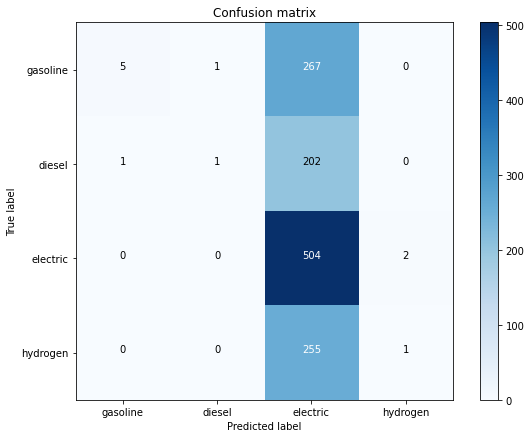

In [42]:
clf.set_params(clf__C=1, clf__gamma=0.001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), precision_score(y_test, y_pred, average='macro'))
plot_confusion_matrix(y_test, y_pred, target_names=target_names)

0.42857142857142855
0.4000078079433768 0.42857142857142855 0.4066753342233604
0.3489913089390393 0.3519224283615468 0.3823882073033411


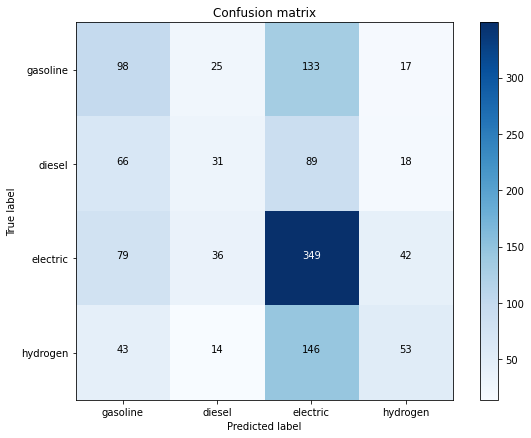

In [43]:
clf.set_params(clf__C=1000, clf__gamma=0.001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), precision_score(y_test, y_pred, average='macro'))
plot_confusion_matrix(y_test, y_pred, target_names=target_names)

In [ ]:
for C in [10**i for i in range(-5, 5)]:
    for gamma in [10**i for i in range(-5, 5)]:
        clf.set_params(clf__C=C, clf__gamma=gamma)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        print(C, gamma, precision_score(y_test, y_pred, average='weighted'), accuracy_score(y_test, y_pred))
#         plot_confusion_matrix(y_test, y_pred, target_names=target_names)

In [18]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('pca', PCA()),
    ('clf', svm.SVC()),
])

In [19]:
clf.get_params()

{'memory': None,
 'steps': [('pca', PCA()), ('clf', SVC())],
 'verbose': False,
 'pca': PCA(),
 'clf': SVC(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'clf__C': 1.0,
 'clf__break_ties': False,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 'scale',
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

1e-05 1e-05
0.16678554980356597
0.40839386602098465


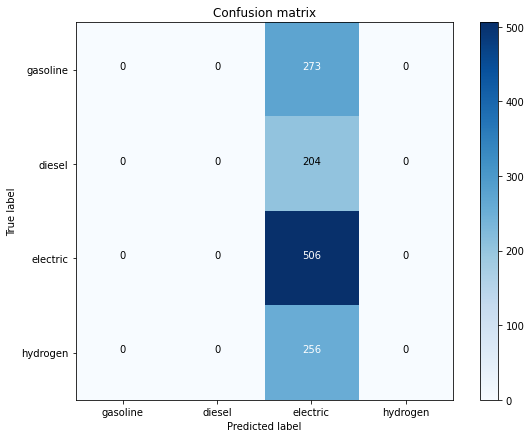

1e-05 0.0001
0.16678554980356597
0.40839386602098465


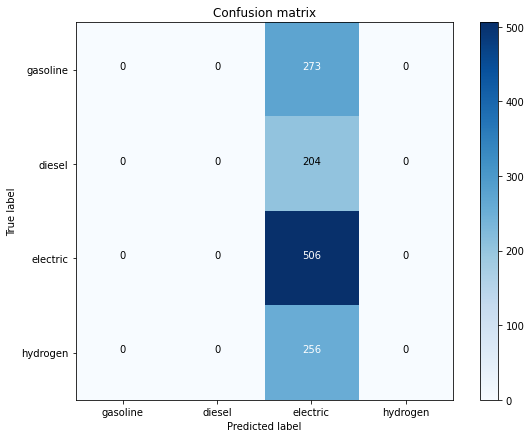

1e-05 0.001
0.16678554980356597
0.40839386602098465


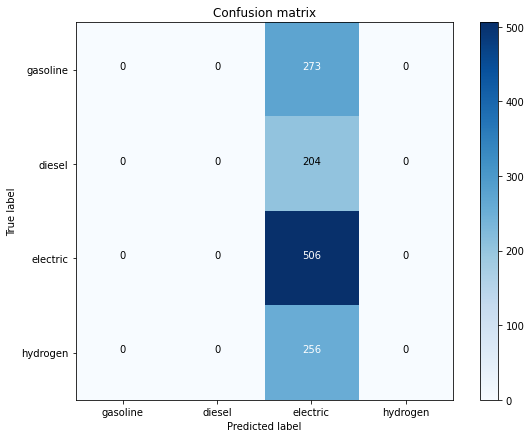

1e-05 0.01
0.16678554980356597
0.40839386602098465


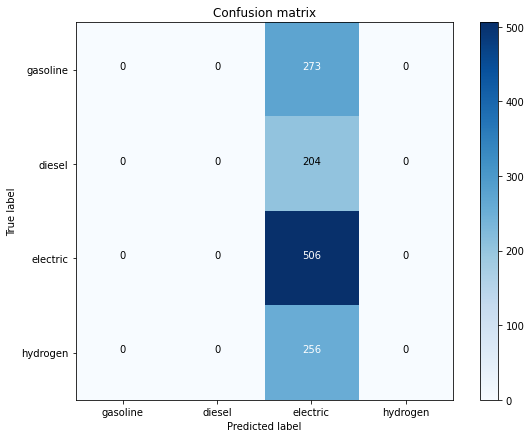

1e-05 0.1
0.16678554980356597
0.40839386602098465


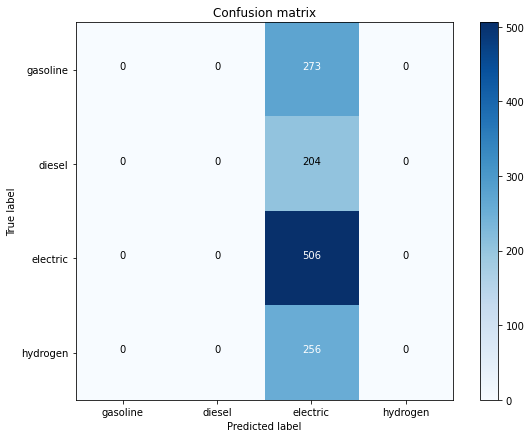

1e-05 1
0.16678554980356597
0.40839386602098465


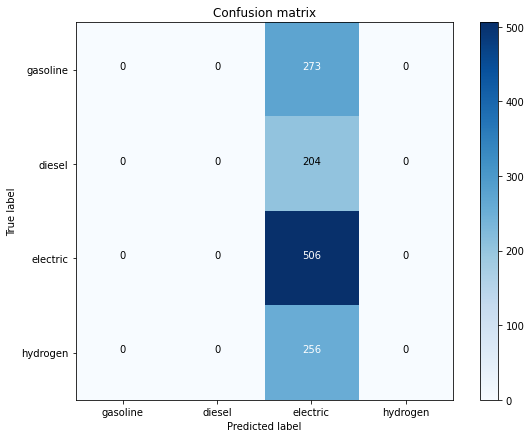

1e-05 10
0.16678554980356597
0.40839386602098465


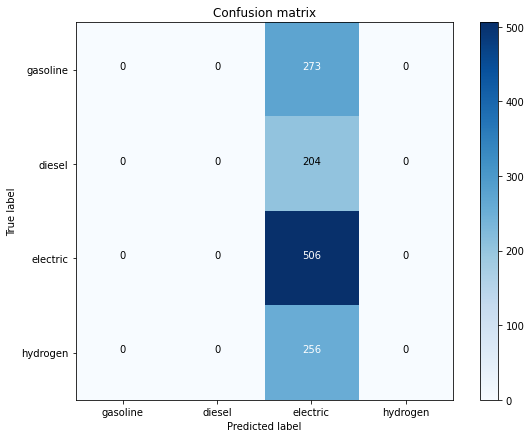

1e-05 100
0.16678554980356597
0.40839386602098465


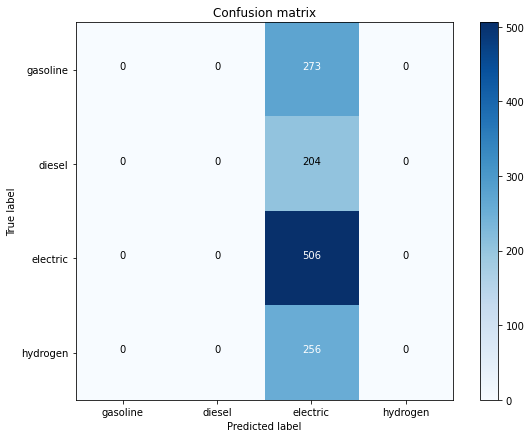

1e-05 1000
0.16678554980356597
0.40839386602098465


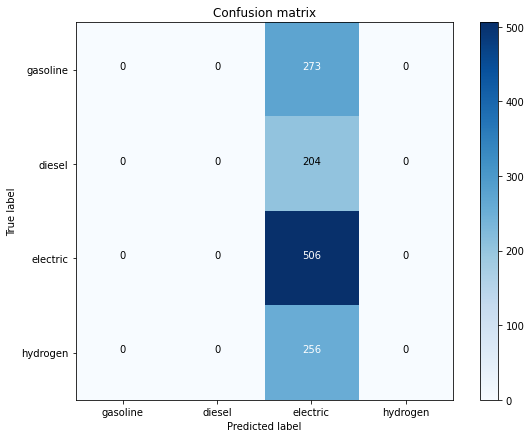

1e-05 10000
0.16678554980356597
0.40839386602098465


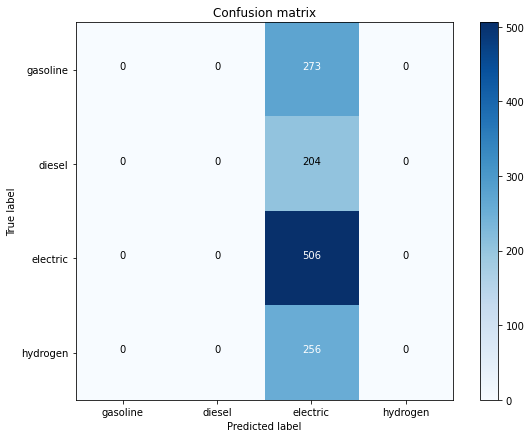

0.0001 1e-05
0.16678554980356597
0.40839386602098465


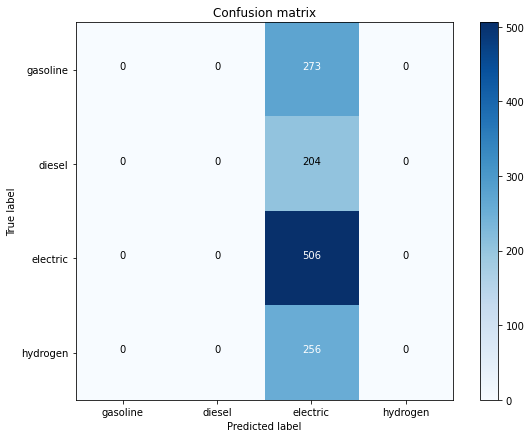

0.0001 0.0001
0.16678554980356597
0.40839386602098465


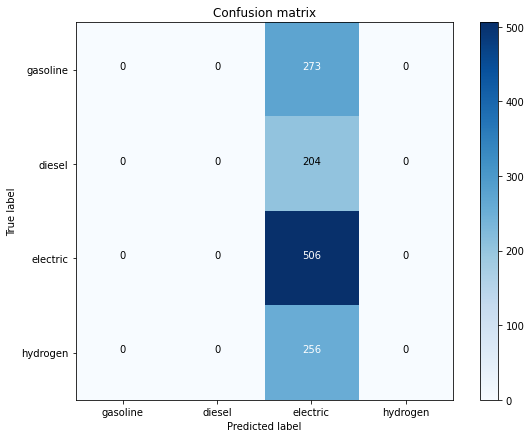

0.0001 0.001
0.16678554980356597
0.40839386602098465


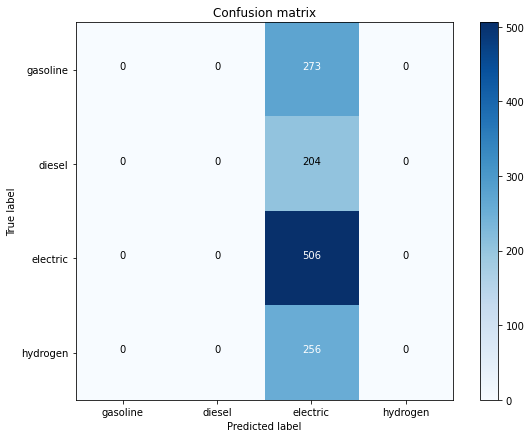

0.0001 0.01
0.16678554980356597
0.40839386602098465


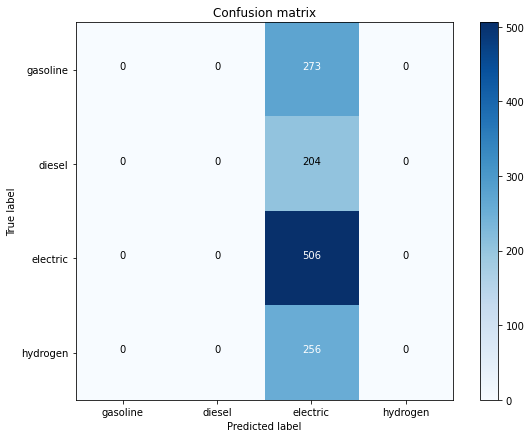

0.0001 0.1
0.16678554980356597
0.40839386602098465


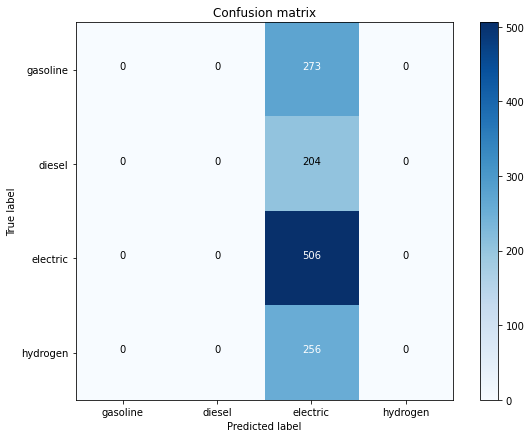

0.0001 1
0.16678554980356597
0.40839386602098465


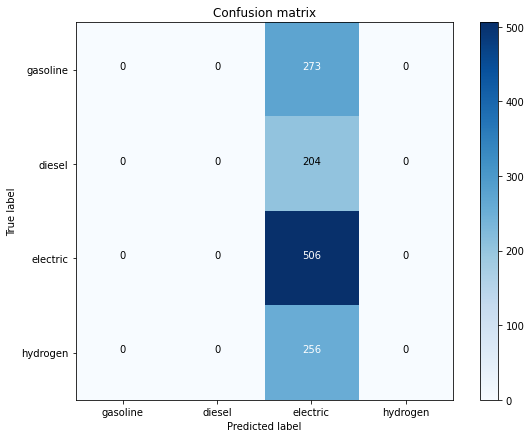

0.0001 10
0.16678554980356597
0.40839386602098465


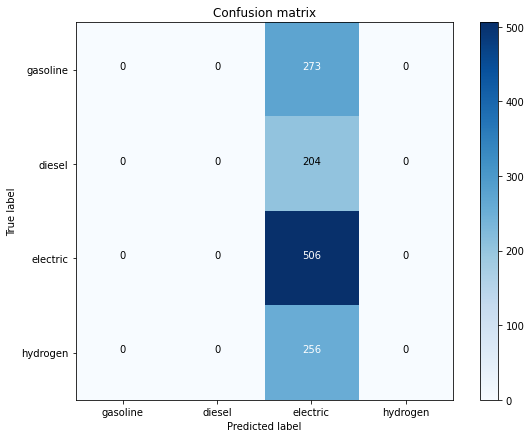

0.0001 100
0.16678554980356597
0.40839386602098465


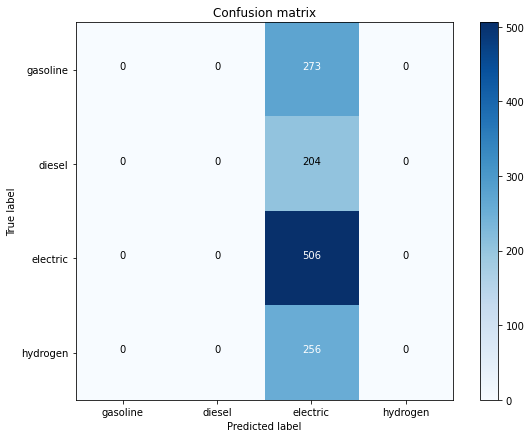

0.0001 1000
0.16678554980356597
0.40839386602098465


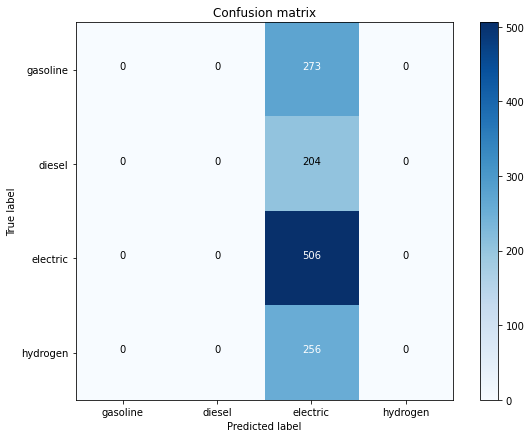

0.0001 10000
0.16678554980356597
0.40839386602098465


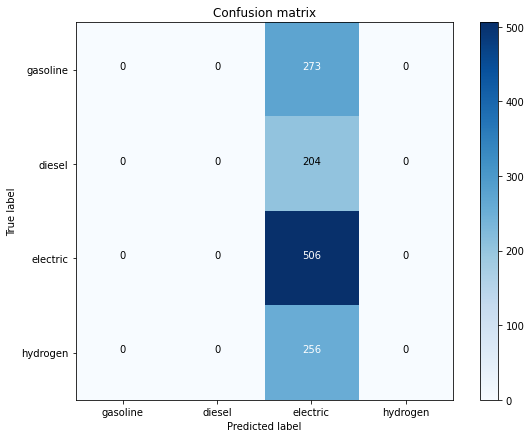

0.001 1e-05
0.16678554980356597
0.40839386602098465


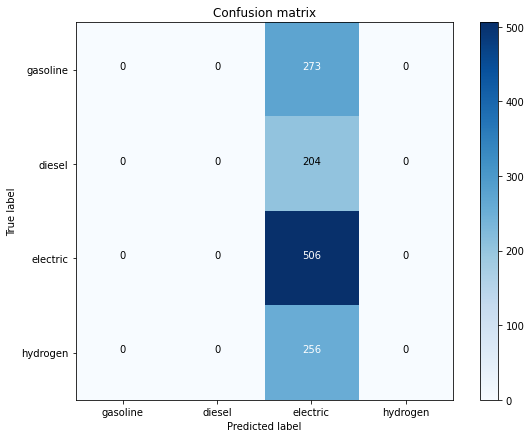

0.001 0.0001
0.16678554980356597
0.40839386602098465


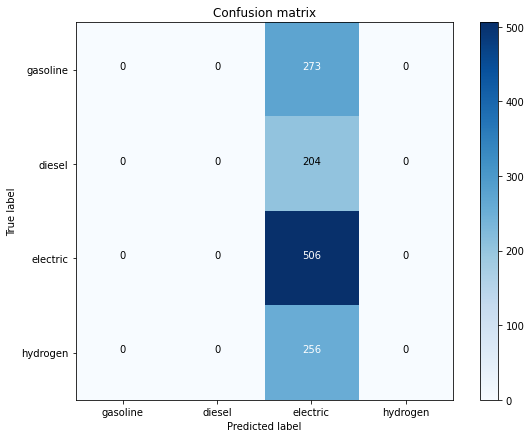

0.001 0.001
0.16678554980356597
0.40839386602098465


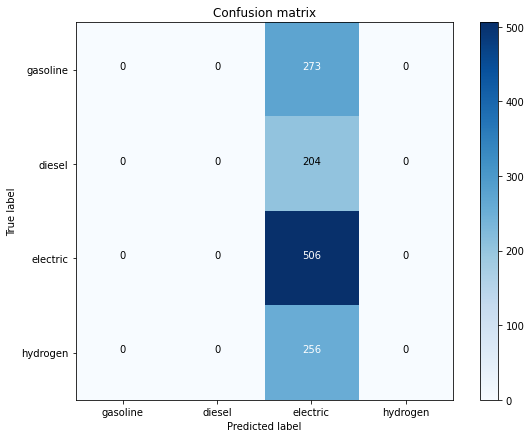

0.001 0.01
0.16678554980356597
0.40839386602098465


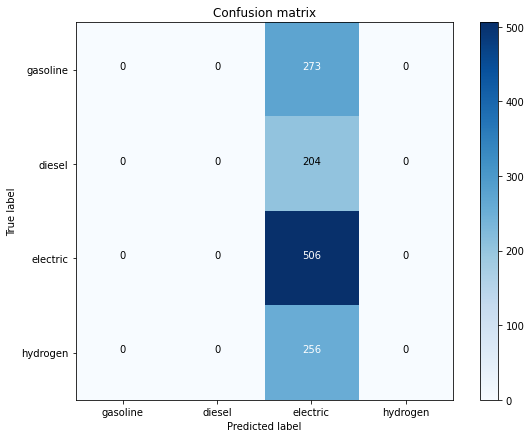

0.001 0.1
0.16678554980356597
0.40839386602098465


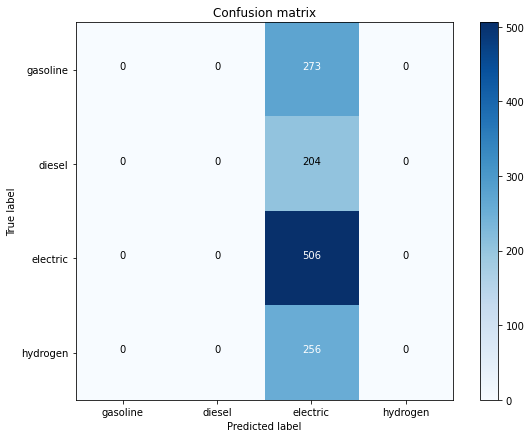

0.001 1
0.16678554980356597
0.40839386602098465


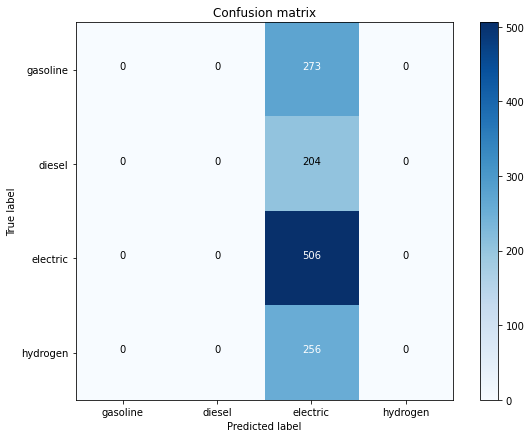

0.001 10
0.16678554980356597
0.40839386602098465


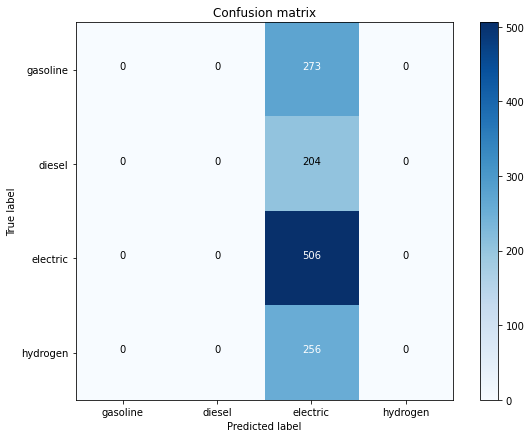

0.001 100
0.16678554980356597
0.40839386602098465


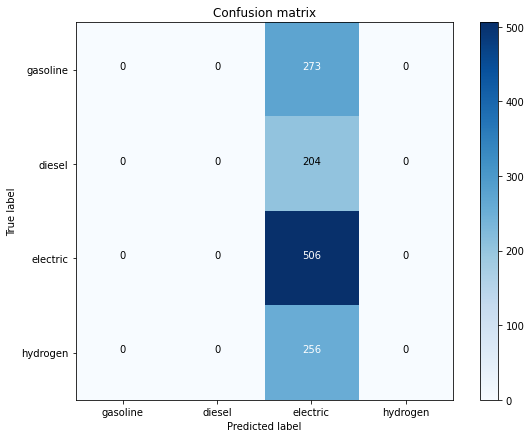

0.001 1000
0.16678554980356597
0.40839386602098465


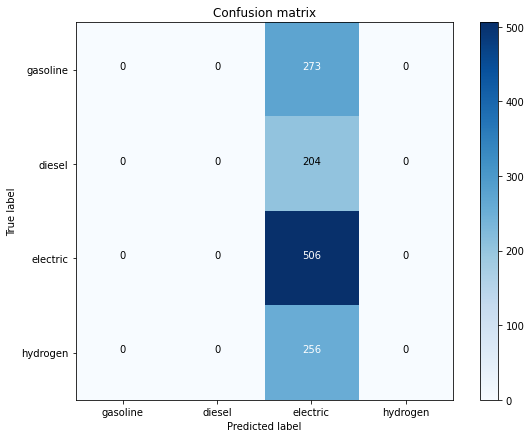

0.001 10000
0.16678554980356597
0.40839386602098465


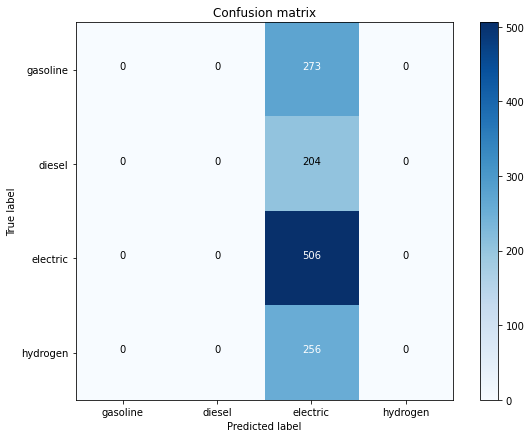

0.01 1e-05
0.16678554980356597
0.40839386602098465


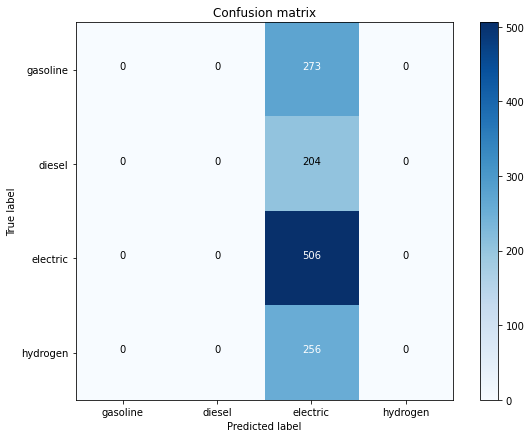

0.01 0.0001
0.16678554980356597
0.40839386602098465


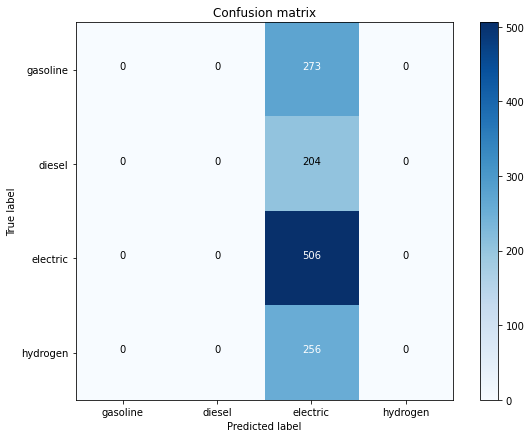

0.01 0.001
0.16678554980356597
0.40839386602098465


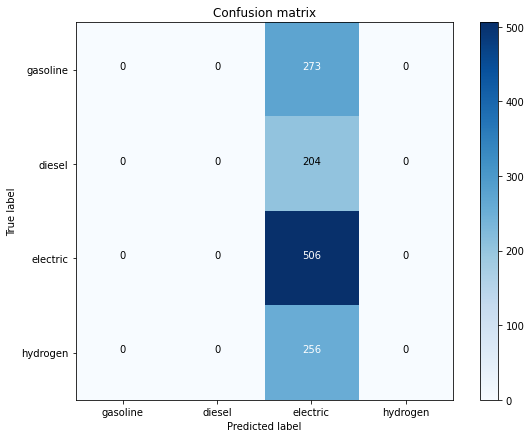

0.01 0.01
0.16678554980356597
0.40839386602098465


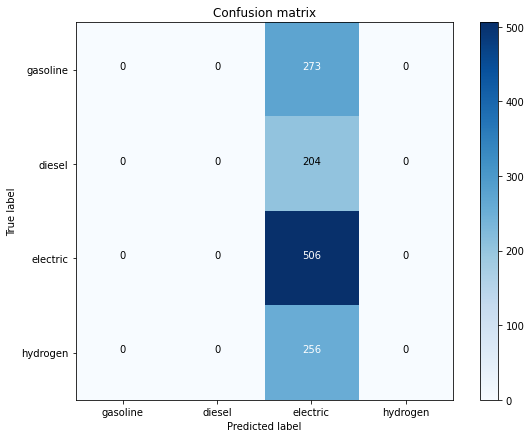

0.01 0.1
0.16678554980356597
0.40839386602098465


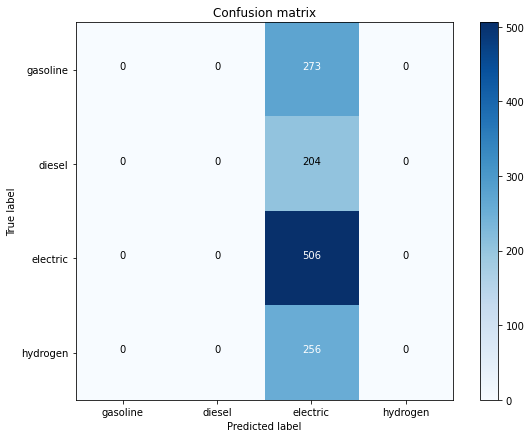

0.01 1
0.16678554980356597
0.40839386602098465


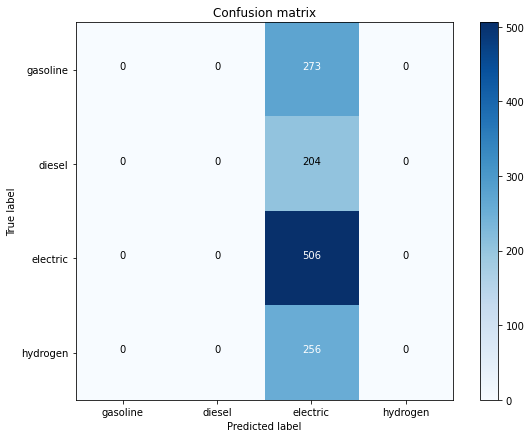

0.01 10
0.16678554980356597
0.40839386602098465


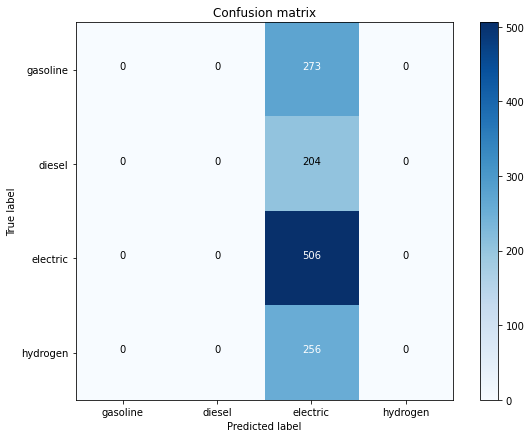

0.01 100
0.16678554980356597
0.40839386602098465


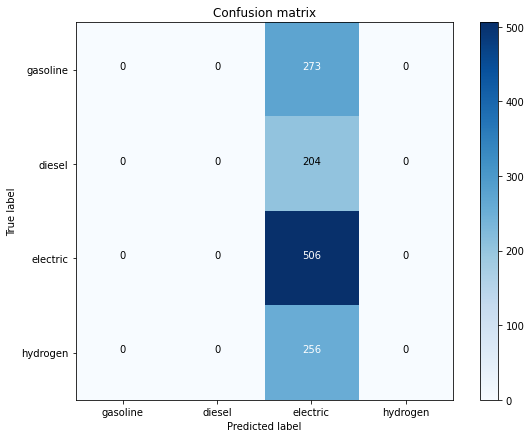

0.01 1000
0.16678554980356597
0.40839386602098465


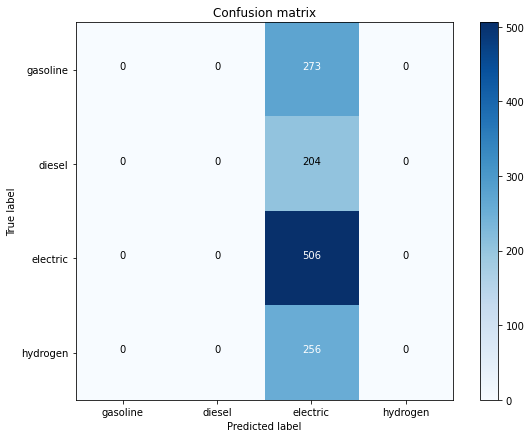

0.01 10000
0.16678554980356597
0.40839386602098465


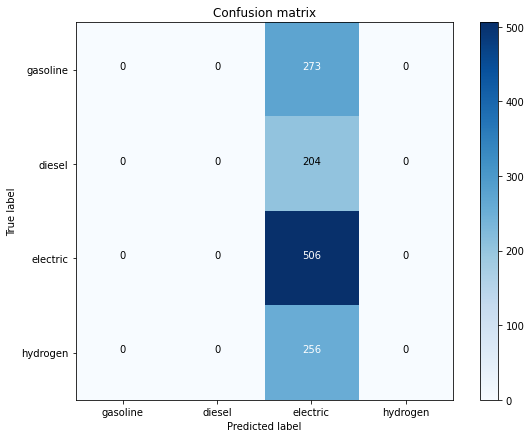

0.1 1e-05
0.23605736432276453
0.40274414850686036


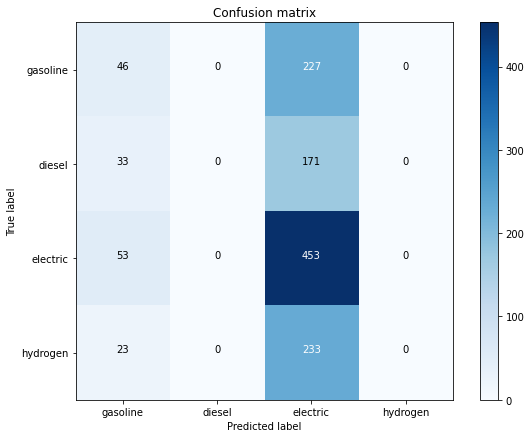

0.1 0.0001
0.23605736432276453
0.40274414850686036


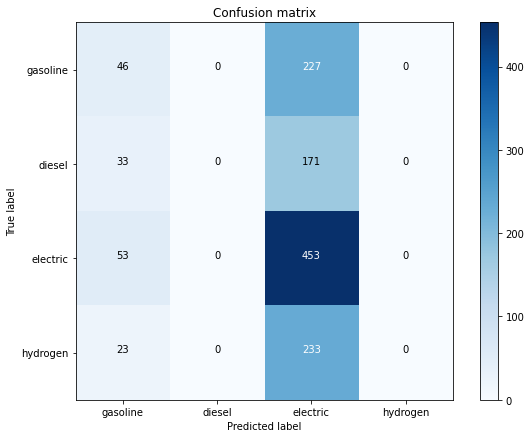

0.1 0.001
0.23605736432276453
0.40274414850686036


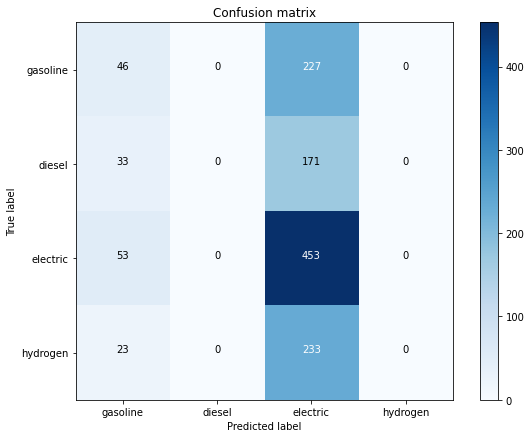

0.1 0.01
0.23605736432276453
0.40274414850686036


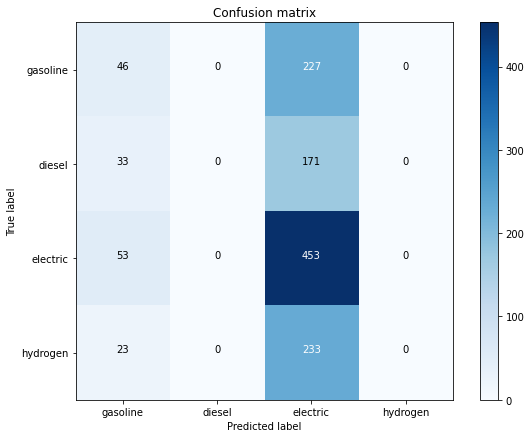

0.1 0.1
0.2531367065862795
0.4132364810330912


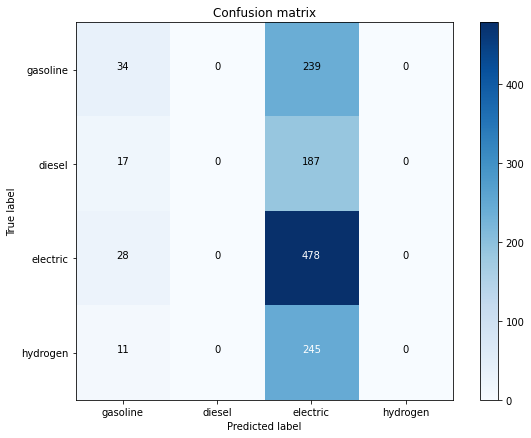

0.1 1
0.16678554980356597
0.40839386602098465


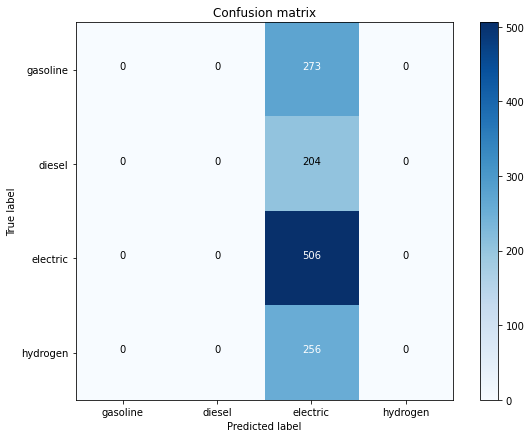

0.1 10
0.16678554980356597
0.40839386602098465


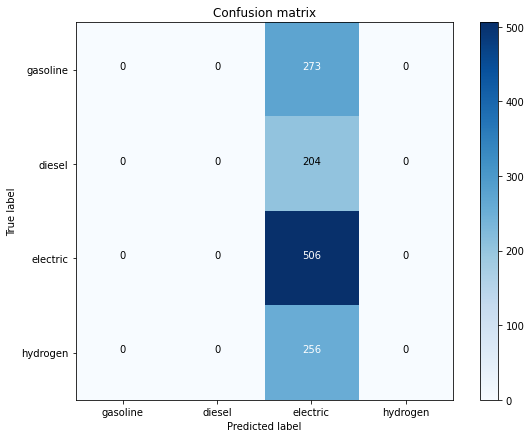

0.1 100
0.16678554980356597
0.40839386602098465


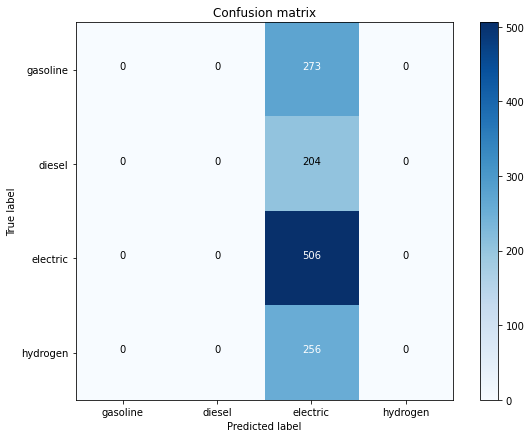

0.1 1000
0.16678554980356597
0.40839386602098465


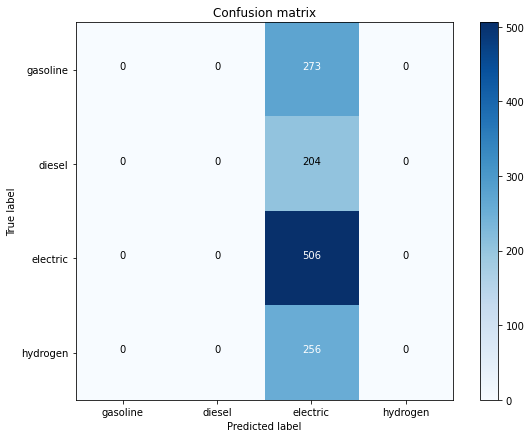

0.1 10000
0.16678554980356597
0.40839386602098465


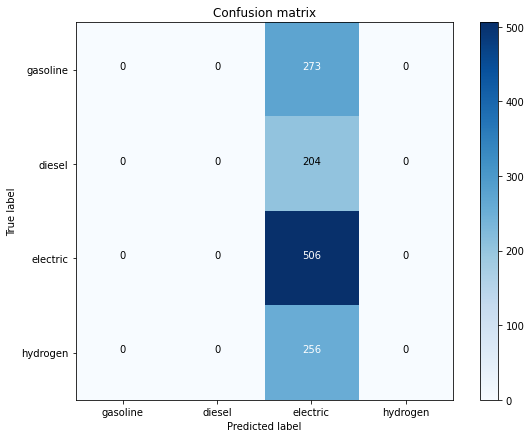

1 1e-05
0.23605736432276453
0.40274414850686036


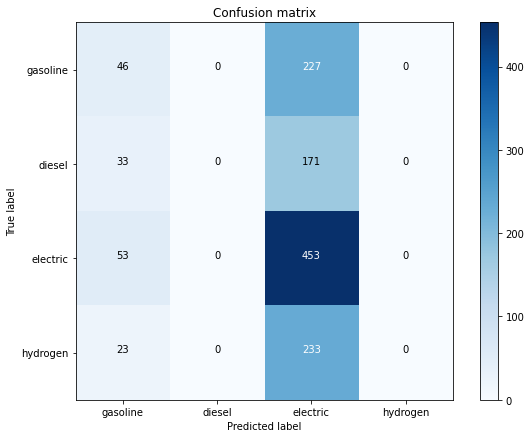

1 0.0001
0.23605736432276453
0.40274414850686036


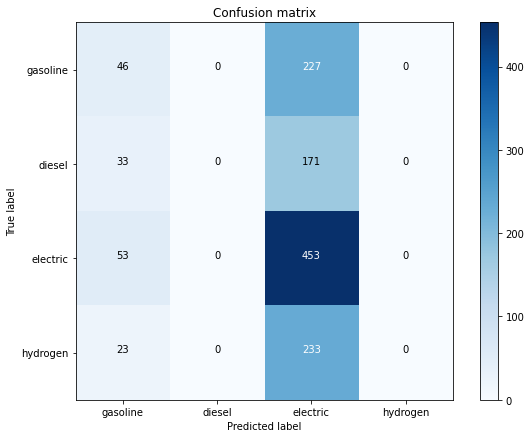

1 0.001
0.23605736432276453
0.40274414850686036


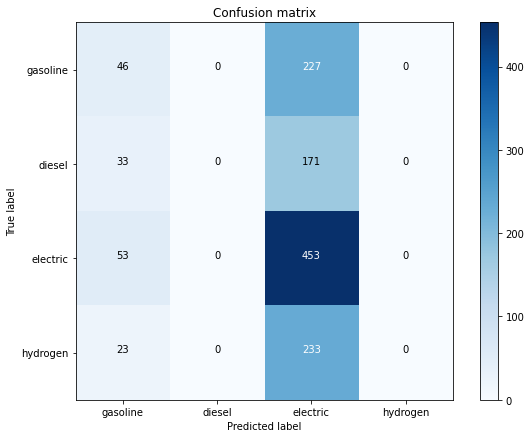

1 0.01
0.23860176103523714
0.4059725585149314


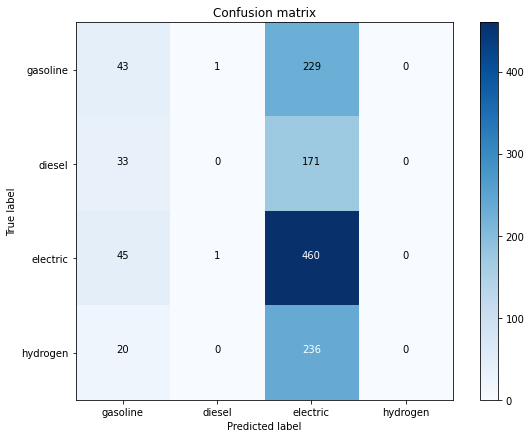

1 0.1
0.3822823817934191
0.4156577885391445


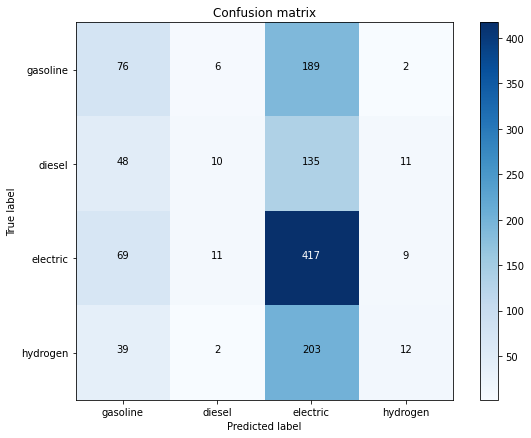

1 1
0.3371173975683065
0.38660209846650523


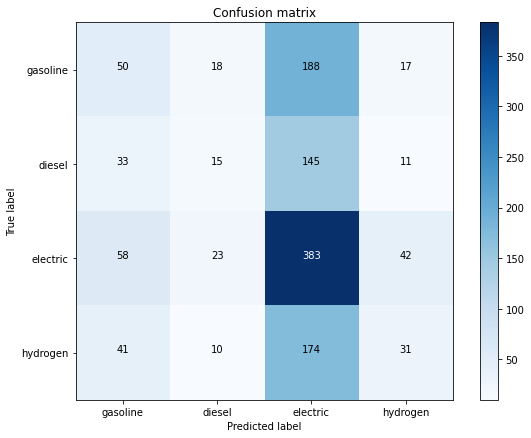

1 10
0.336650148086919
0.3890234059725585


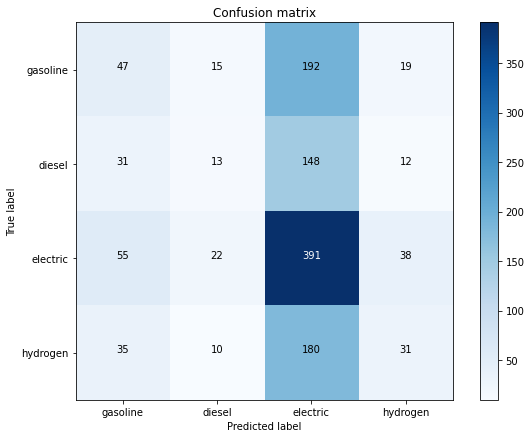

1 100
0.336650148086919
0.3890234059725585


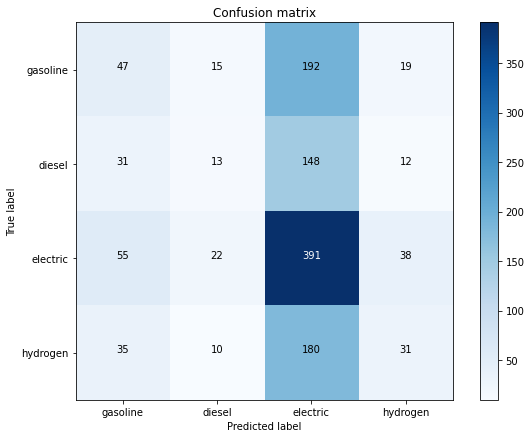

1 1000
0.336650148086919
0.3890234059725585


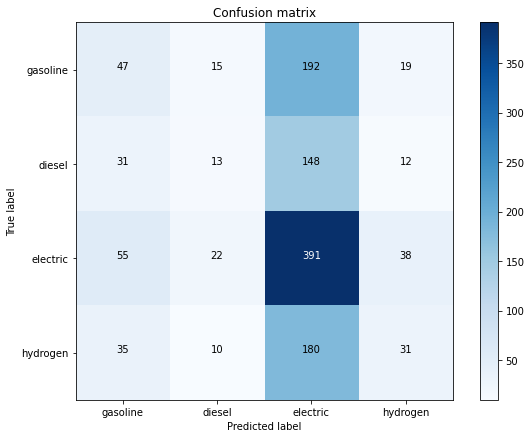

1 10000
0.336650148086919
0.3890234059725585


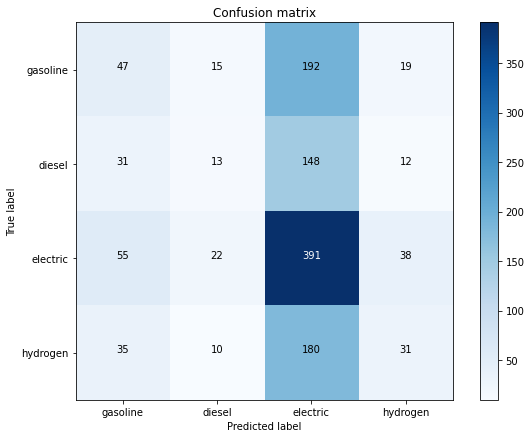

10 1e-05
0.23605736432276453
0.40274414850686036


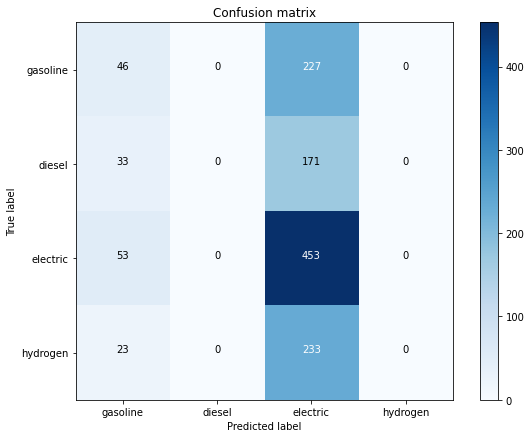

10 0.0001
0.23605736432276453
0.40274414850686036


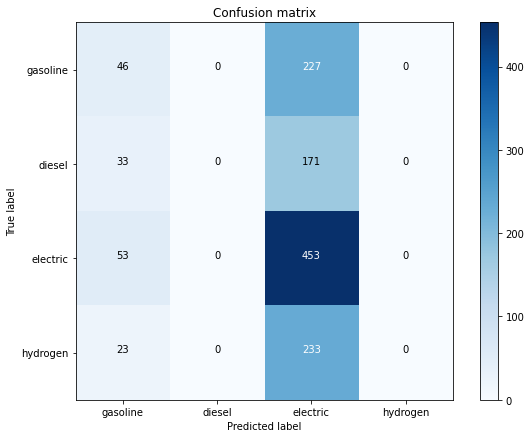

10 0.001
0.23723873971178577
0.4043583535108959


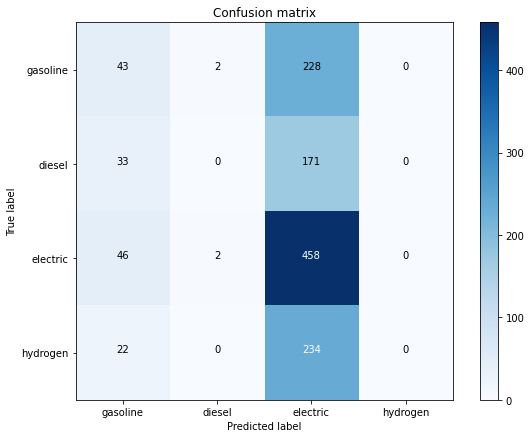

10 0.01
0.3856902805347947
0.42211460855528654


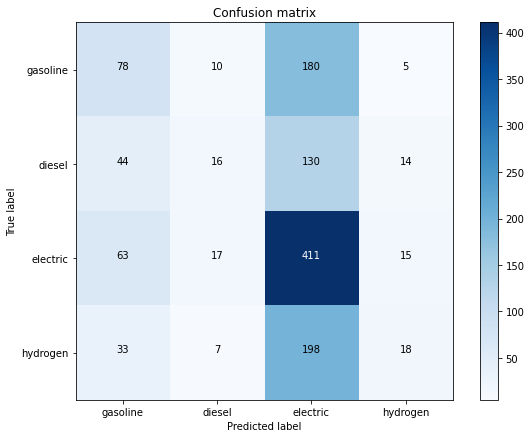

10 0.1
0.3456839205103173
0.3672316384180791


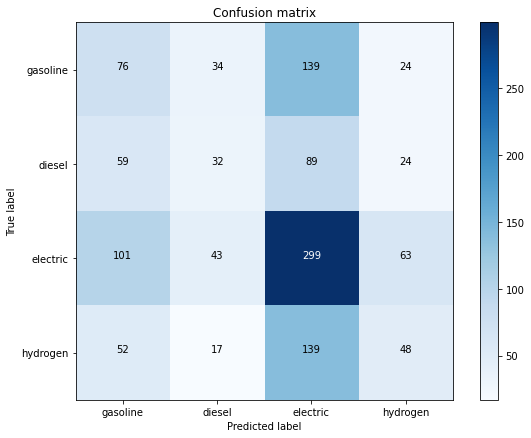

10 1
0.35698416989526327
0.3962873284907183


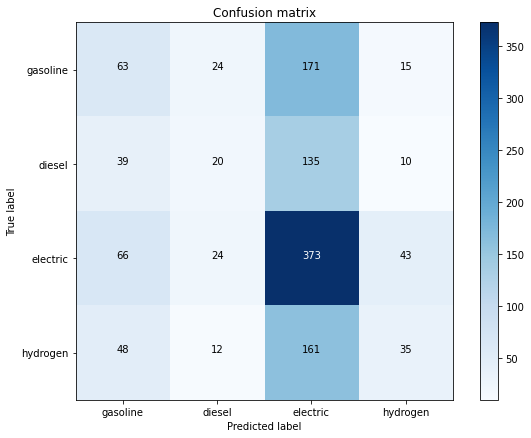

10 10
0.336650148086919
0.3890234059725585


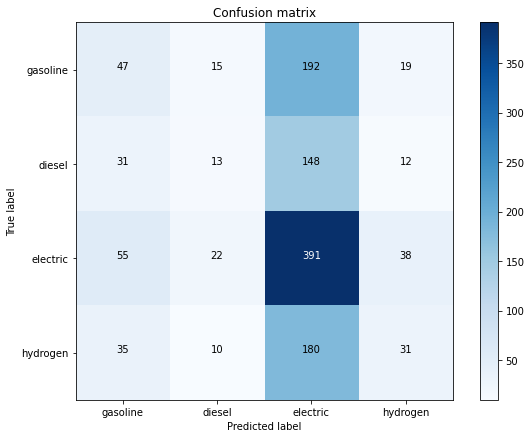

10 100
0.336650148086919
0.3890234059725585


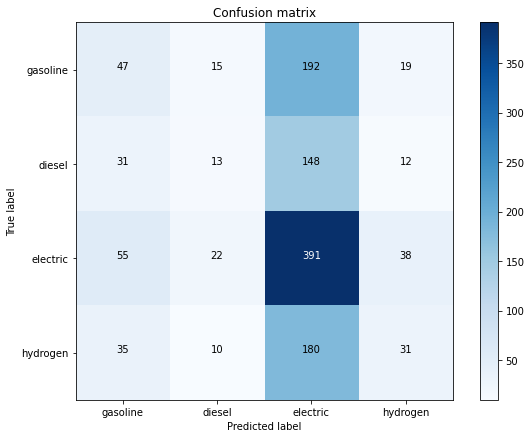

10 1000
0.336650148086919
0.3890234059725585


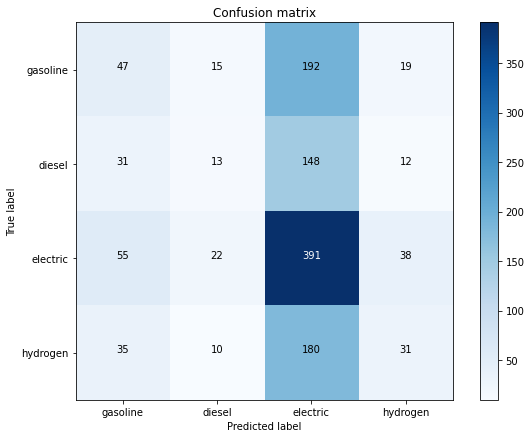

10 10000
0.336650148086919
0.3890234059725585


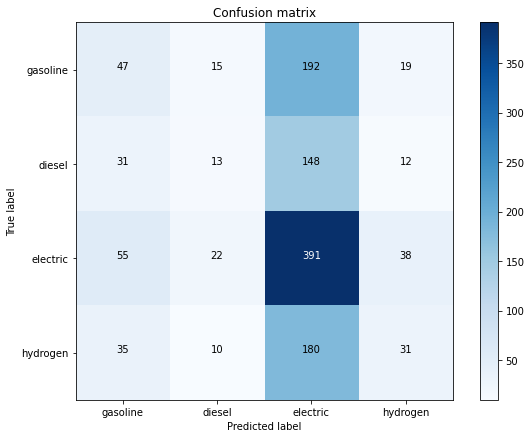

100 1e-05
0.23605736432276453
0.40274414850686036


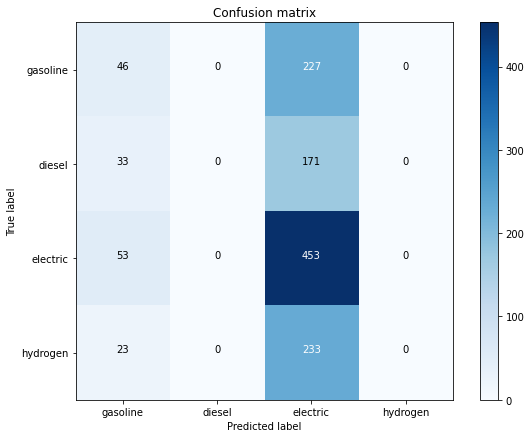

100 0.0001
0.2706286313643893
0.40516545601291365


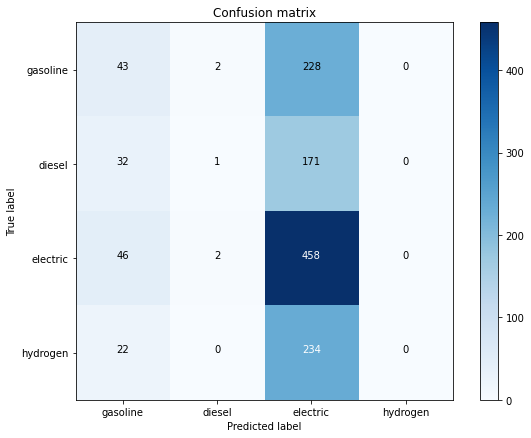

100 0.001
0.3830436724400447
0.420500403551251


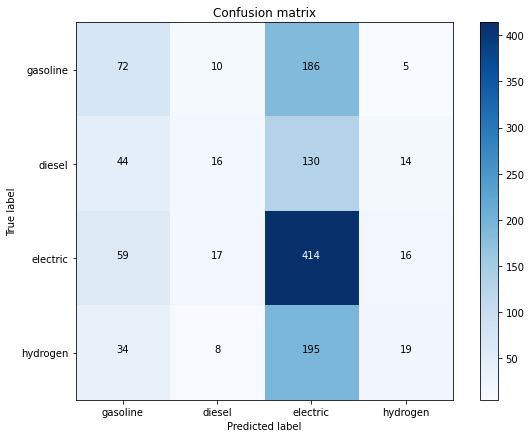

100 0.01
0.3430850978395643
0.3761097659402744


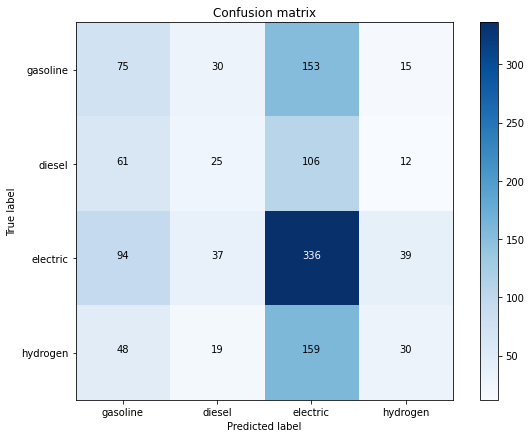

100 0.1
0.3467189063384826
0.35189669087974174


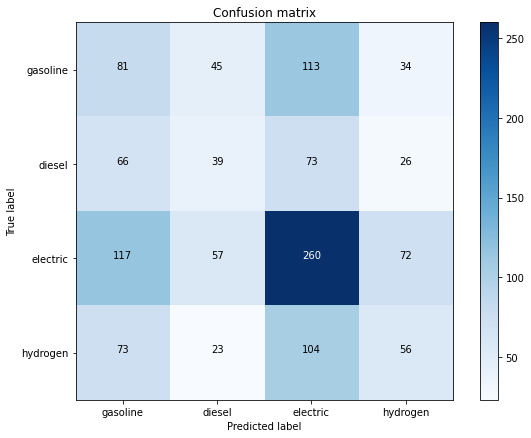

100 1
0.35698416989526327
0.3962873284907183


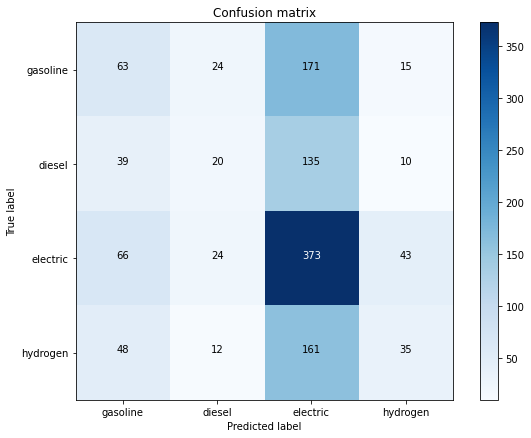

100 10
0.336650148086919
0.3890234059725585


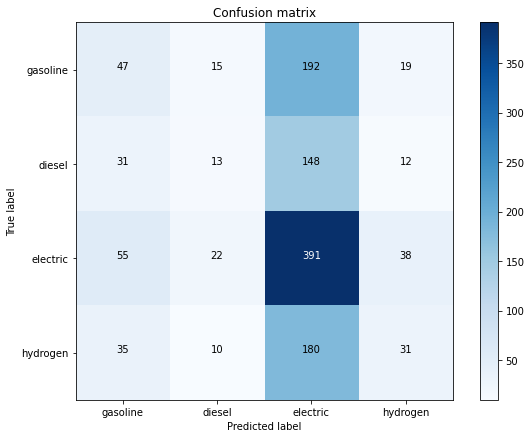

100 100
0.336650148086919
0.3890234059725585


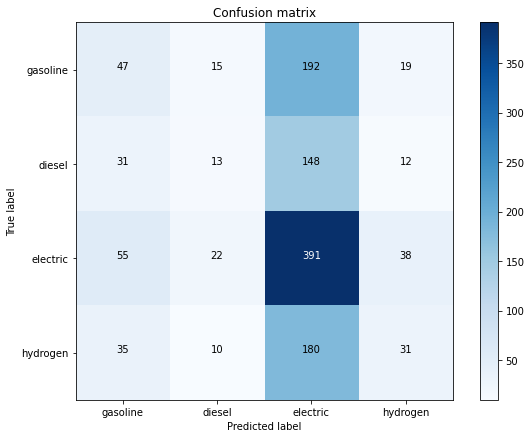

100 1000
0.336650148086919
0.3890234059725585


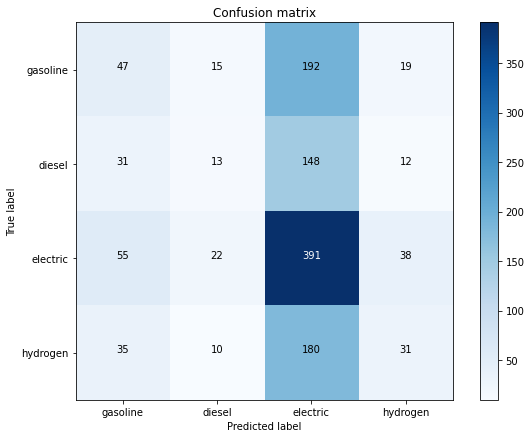

100 10000
0.336650148086919
0.3890234059725585


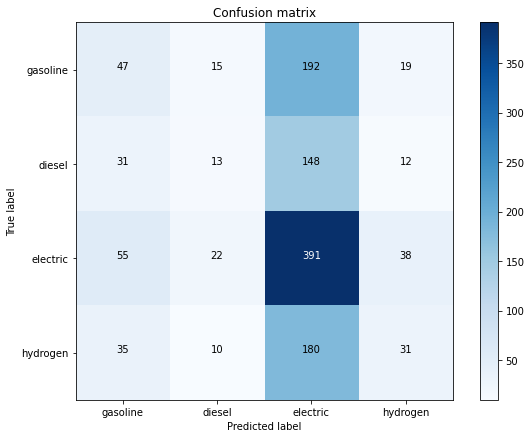

1000 1e-05
0.2706286313643893
0.40516545601291365


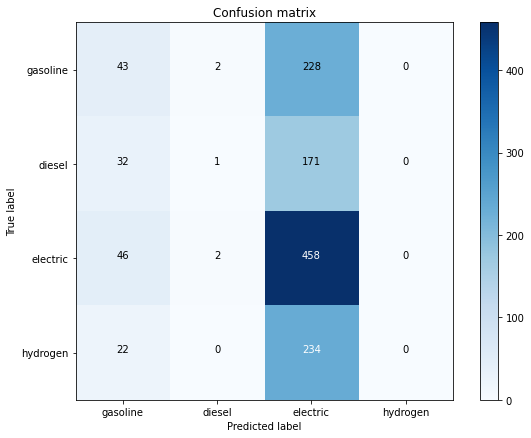

1000 0.0001
0.3860145705086982
0.4213075060532688


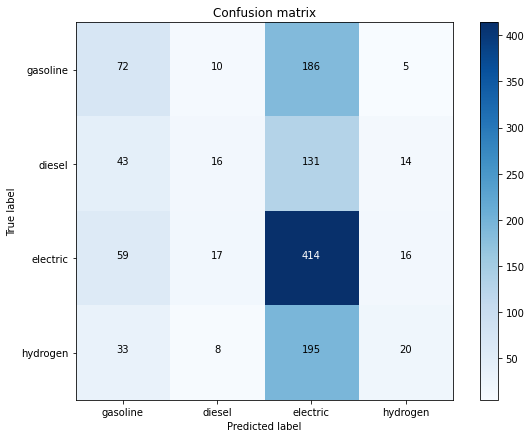

1000 0.001
0.34042566888063025
0.3785310734463277


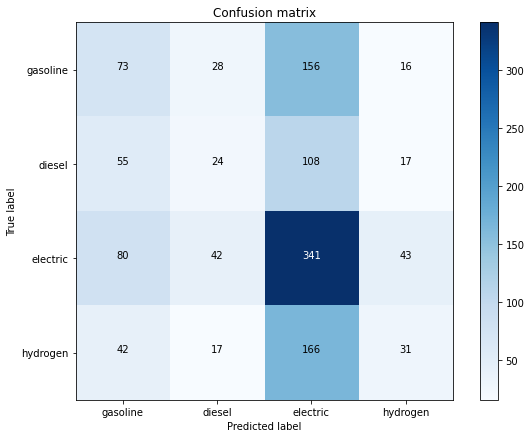

1000 0.01
0.34026502601293496
0.3527037933817595


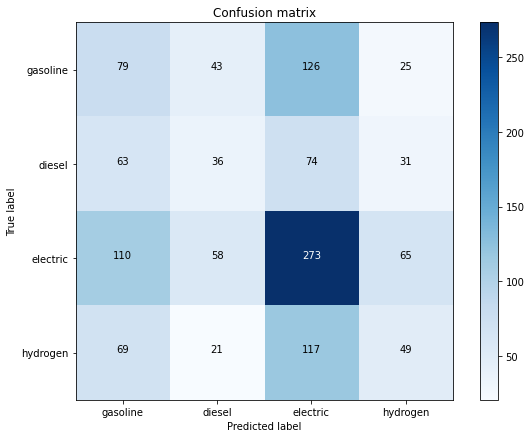

1000 0.1
0.34884187771771513
0.3527037933817595


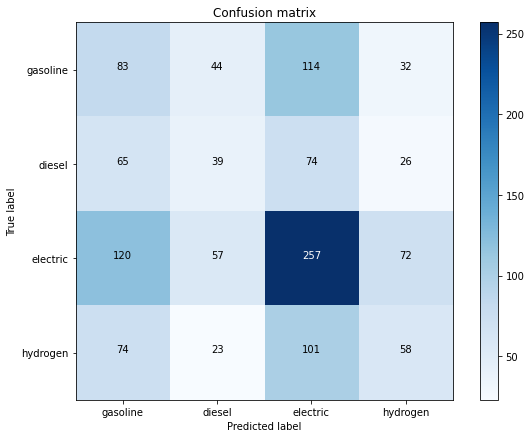

1000 1
0.35698416989526327
0.3962873284907183


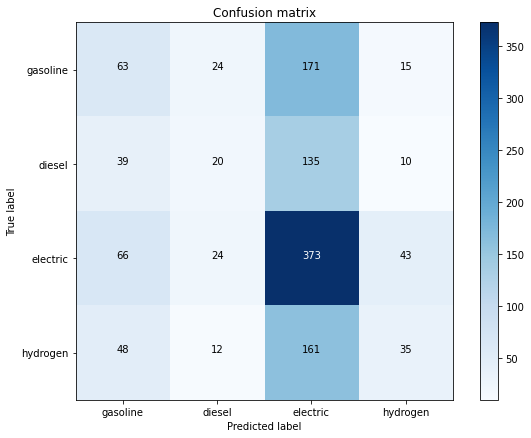

1000 10
0.336650148086919
0.3890234059725585


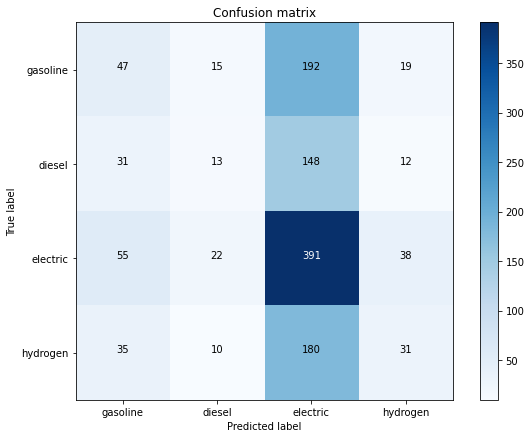

1000 100
0.336650148086919
0.3890234059725585


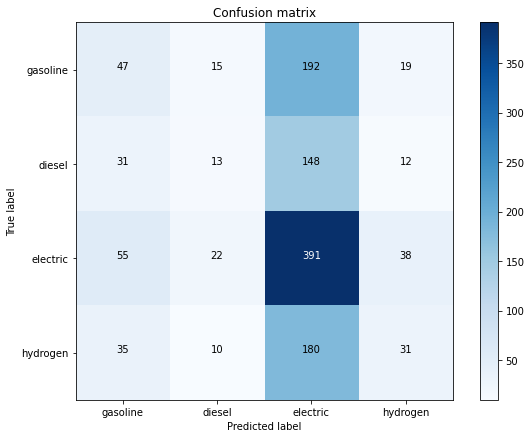

1000 1000
0.336650148086919
0.3890234059725585


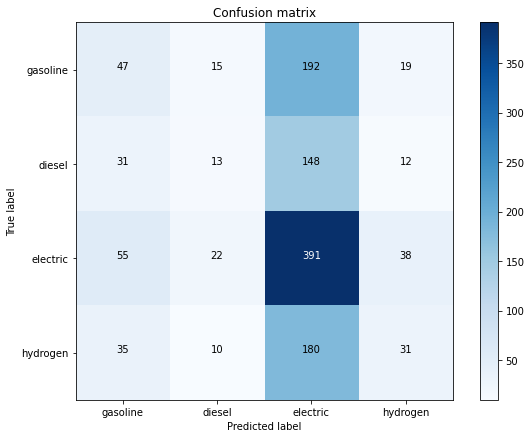

1000 10000
0.336650148086919
0.3890234059725585


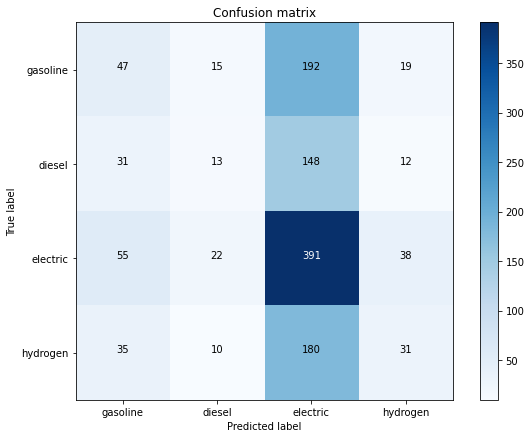

10000 1e-05
0.3860145705086982
0.4213075060532688


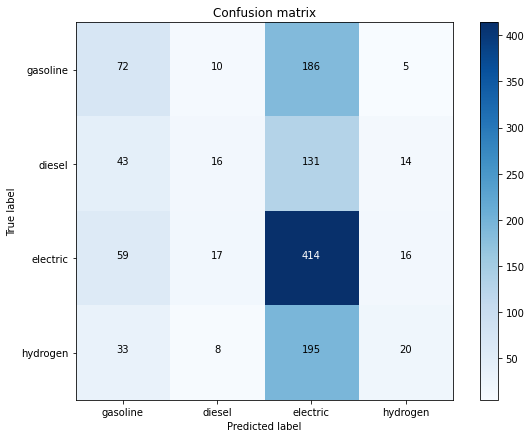

10000 0.0001
0.3378933232769418
0.38256658595641646


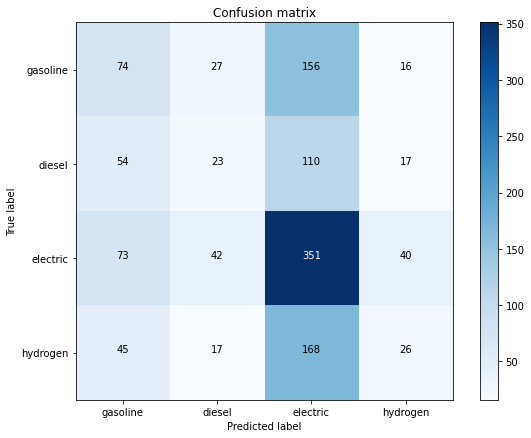

10000 0.001
0.343475276509421
0.3728813559322034


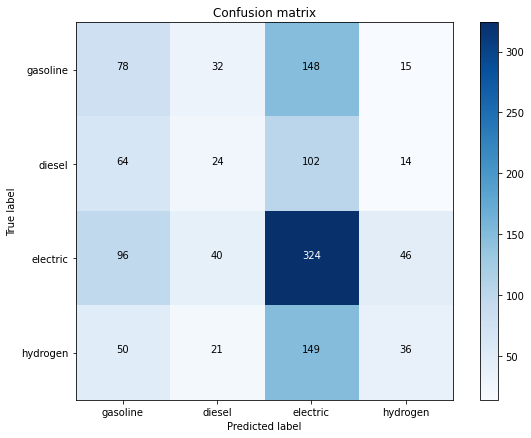

10000 0.01
0.341967021073754
0.33817594834543985


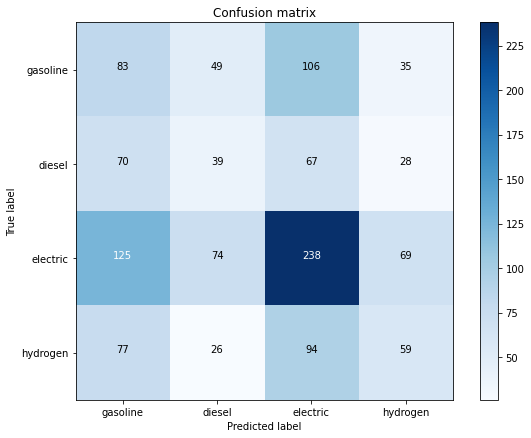

10000 0.1
0.34884187771771513
0.3527037933817595


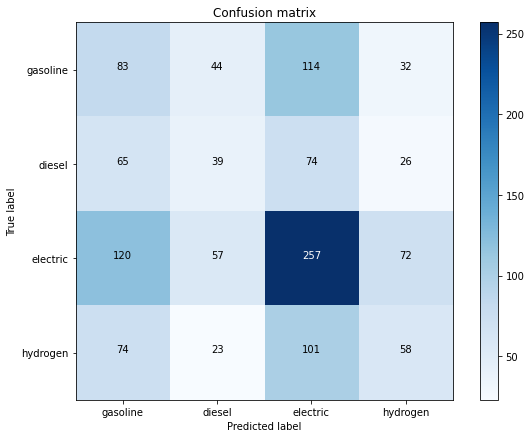

10000 1
0.35698416989526327
0.3962873284907183


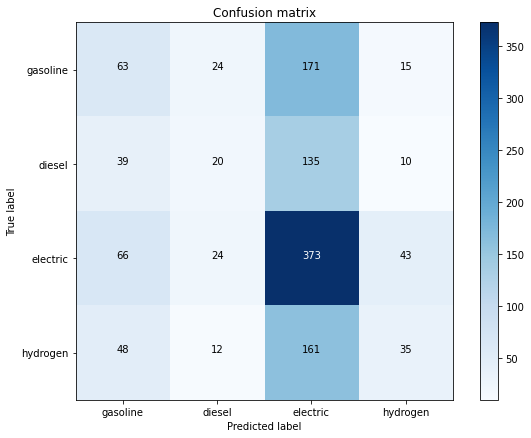

10000 10
0.336650148086919
0.3890234059725585


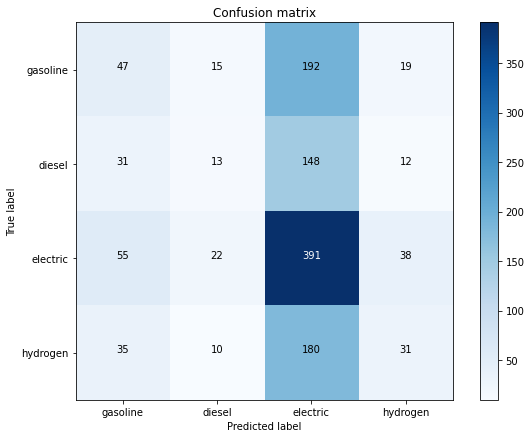

10000 100
0.336650148086919
0.3890234059725585


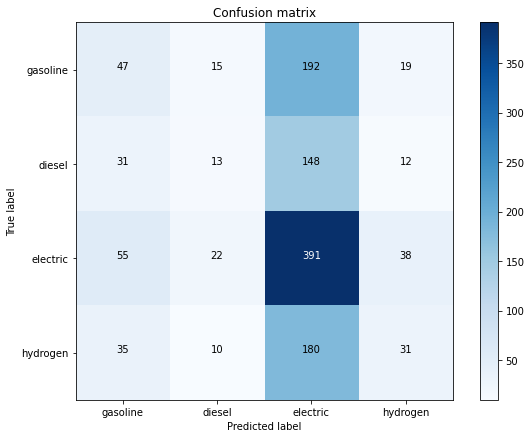

10000 1000
0.336650148086919
0.3890234059725585


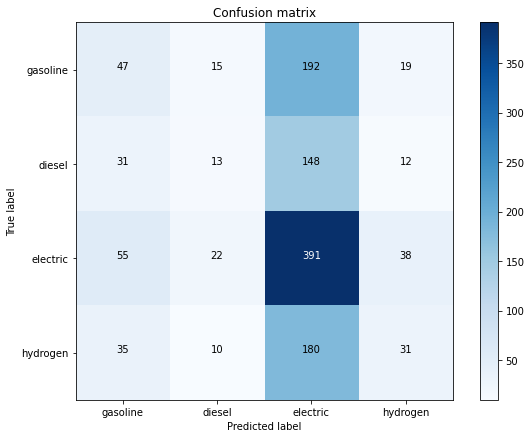

10000 10000
0.336650148086919
0.3890234059725585


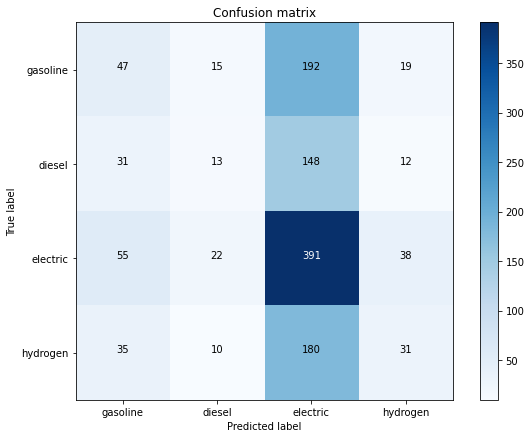

In [21]:
for C in [10**i for i in range(-5, 5)]:
    for gamma in [10**i for i in range(-5, 5)]:
        clf.set_params(clf__C=C, clf__gamma=gamma)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        print(C, gamma)
        print(precision_score(y_test, y_pred, average='weighted'))
        print(accuracy_score(y_test, y_pred))
        plot_confusion_matrix(y_test, y_pred, target_names=target_names)

1 0.01
0.23860176103523714
0.4059725585149314


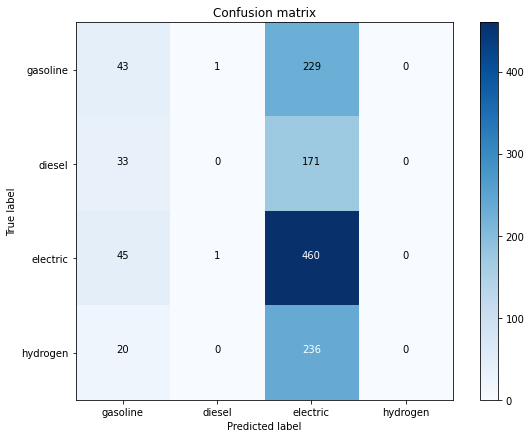

1 0.02
0.5158025679558139
0.41404358353510895


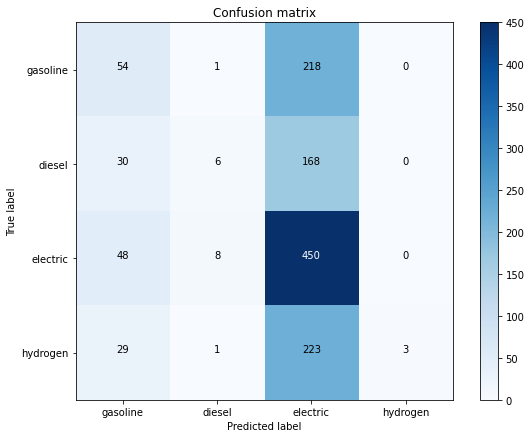

1 0.03
0.36336322599435134
0.4124293785310734


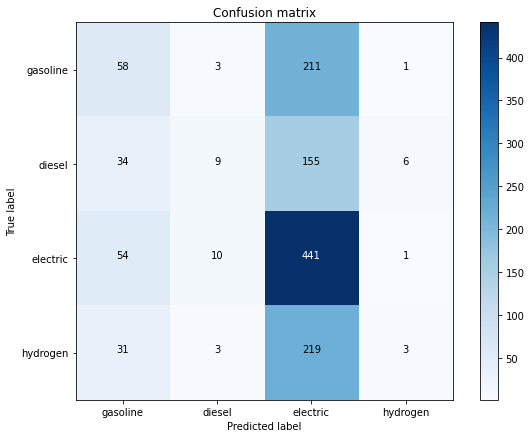

1 0.04
0.3828189477278708
0.41081517352703795


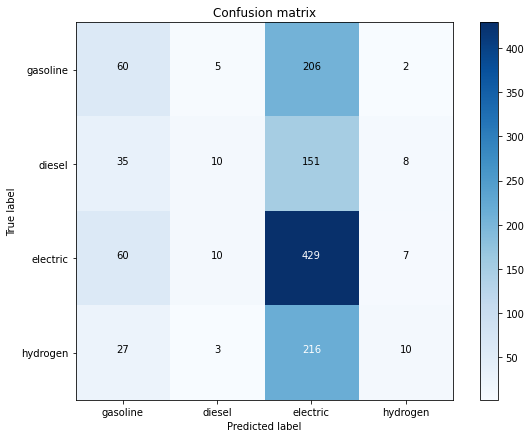

1 0.05
0.3924418429714859
0.41646489104116224


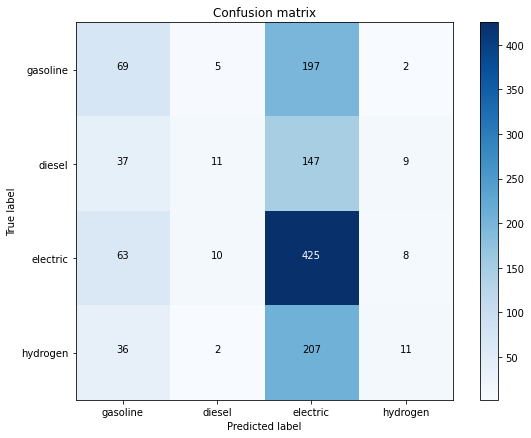

1 0.06
0.40136311957066995
0.4180790960451977


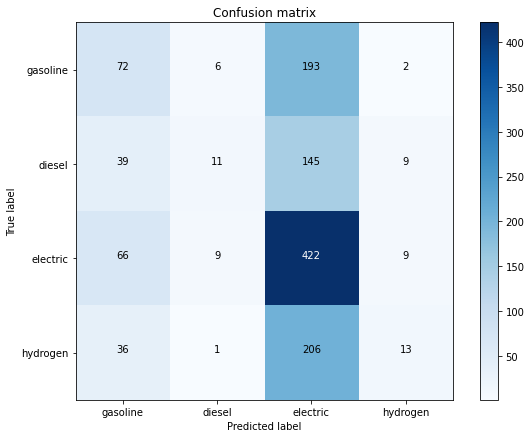

1 0.07
0.40348614397505267
0.420500403551251


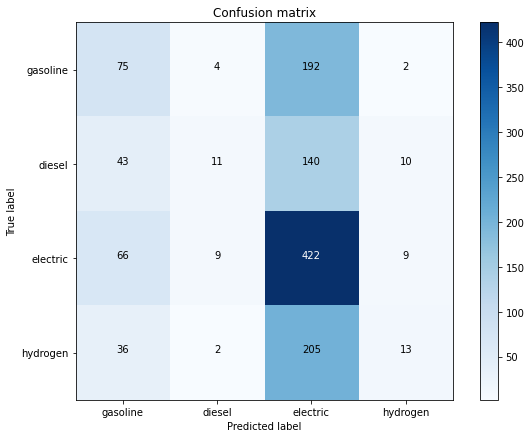

1 0.08
0.3986819089196625
0.4188861985472155


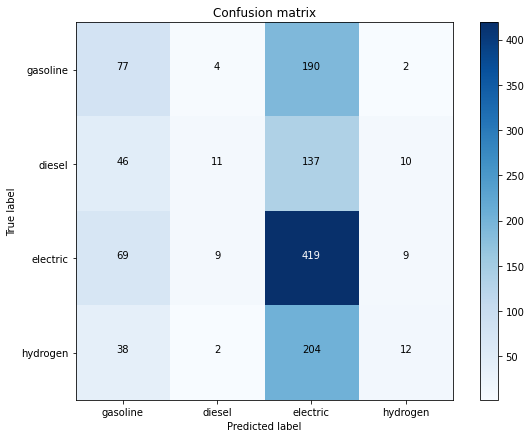

1 0.09
0.37976143999634504
0.41404358353510895


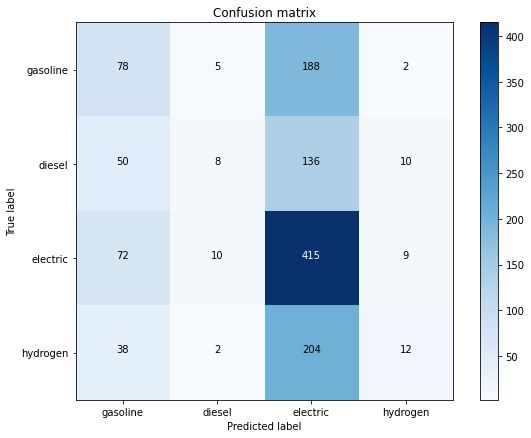

1 0.1
0.3822823817934191
0.4156577885391445


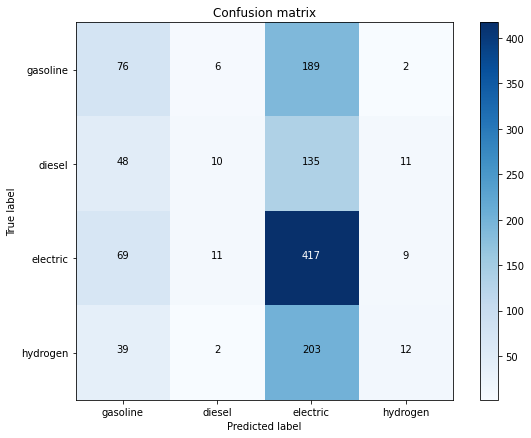

In [24]:
# 10, 0.01
# 1, 0.1
for C in [1]:
    for C_gamma in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
        gamma = C_gamma / C
        clf.set_params(clf__C=C, clf__gamma=gamma)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        print(C, gamma)
        print(precision_score(y_test, y_pred, average='weighted'))
        print(accuracy_score(y_test, y_pred))
        plot_confusion_matrix(y_test, y_pred, target_names=target_names)

In [429]:
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

        Car1       0.88      0.73      0.80        63
        Car2       0.69      0.90      0.78        48
        Car3       0.00      0.00      0.00         3

    accuracy                           0.78       114
   macro avg       0.53      0.54      0.53       114
weighted avg       0.78      0.78      0.77       114



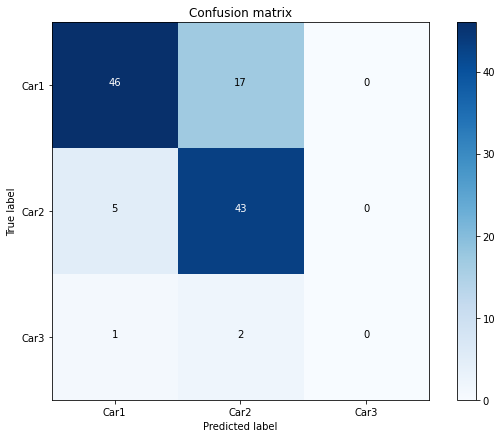

In [430]:
print(classification_report(y_test, y_pred, target_names=target_names,))
plot_confusion_matrix(y_test, y_pred, target_names=target_names, )

#### MNL

In [99]:
clf = LogisticRegression()
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

        Car1       0.00      0.00      0.00         0
        Car2       0.44      0.25      0.32        63
        Car3       0.38      0.62      0.48        48

   micro avg       0.40      0.41      0.41       111
   macro avg       0.28      0.29      0.27       111
weighted avg       0.42      0.41      0.39       111



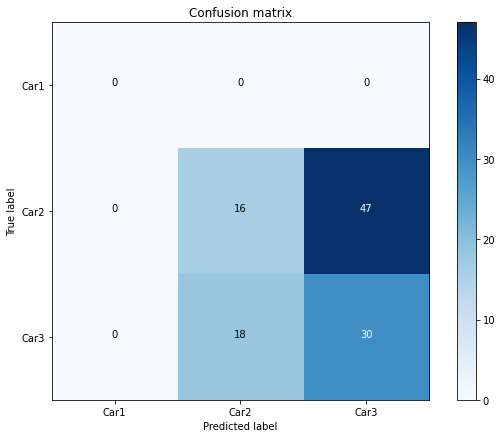

In [100]:
print(classification_report(y_test, y_pred,target_names=target_names, labels=list(range(len(target_names)))))
plot_confusion_matrix(y_test, y_pred,target_names=target_names, labels=list(range(len(target_names))))

In [101]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 choice   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     7.600
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.52e-27
Time:                        14:48:58   Log-Likelihood:                -57.654
No. Observations:                 264   AIC:                             227.3
Df Residuals:                     208   BIC:                             427.6
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1775      0.030      5.842      0.0

In [102]:
import statsmodels.api as sm

X2 = sm.add_constant(pd.DataFrame(X_train, columns=FEATURE_NAMES))
est = sm.OLS(list(y_train), X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     7.600
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.52e-27
Time:                        14:49:00   Log-Likelihood:                -57.654
No. Observations:                 264   AIC:                             227.3
Df Residuals:                     208   BIC:                             427.6
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1775      0.030  